# **LATAR BELAKANG**

Amazon adalah salah satu perusahaan _e-commerce_ besar di dunia. Sebagai salah satu yang terbesar, Amazon menggunakan SaaS (Software-as-a-Service) karena begitu banyak keunggulan di dalamnya seperti _deployment_ yang cepat, dan aksesabilitas _cloud_ yang dapat diakses dari perangkat manapun. Setelah semua data terekam dalam SaaS, Amazon ingin meningkatkan kinerja bisnis secara keseluruhan.


# **PERNYATAAN MASALAH**
Amazon ingin mengetahui performa _sales_, perilaku pelanggan, performa produk, dan profit untuk meningkatkan kinerja bisnis secara keseluruhan. Informasi ini akan memberikan wawasan terkait dinamika penjualan perusahaan, mendukung perencanaan strategis dan pertumbuhan bisnis.

Sebagai seorang _data analyst_ , akan menjawab pertanyaan sebagai berikut :
- Bagaimana tren penjualan keseluruhan selama periode waktu yang berbeda (misalnya bulanan, tahunan)?
- Bagaimana karakteristik customer SaaS Amazon?
- Produk manakah yang memiliki penjualan dan kontribusi pendapatan tertinggi dan apakah ada pola atau tren musiman dalam penjualan produk?
- Bagaimana tingkat _discount_ mempengaruhi profit transaksi penjualan secara keseluruhan?
- Negara manakah yang menunjukkan potensi pertumbuhan tertinggi berdasarkan data penjualan?


# **DATA**

Telah disediakan data yang dikumpulkan oleh perusahaan untuk menjawab pertanyaan masalah di atas. Data tersebut berasal dari: [Sumber](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc # untuk melakukan uji normalitas
import warnings
warnings.filterwarnings("ignore")


Dataset ini berisi data transaksi dari perusahaan SaaS yang menjual software penjualan dan pemasaran ke perusahaan lain (B2B). Dalam kumpulan data, setiap baris mewakili satu transaksi/pesanan (9.994 transaksi), dan kolomnya meliputi:
- Row ID    : Pengidentifikasi unik untuk setiap transaksi.
- Order ID  : Pengidentifikasi unik untuk setiap pesanan.
- Order Date : Tanggal saat pesanan dilakukan.
- Date Key : Representasi numerik dari tanggal pemesanan dengan format tahun-bulan-hari.
- Contact Name : Nama orang yang melakukan pemesanan.
- Country : Negara tempat pemesanan dilakukan.
- City : Kota tempat pemesanan dilakukan.
- Region : Wilayah tempat pemesanan dilakukan.
- Subregion : Subwilayah tempat pemesanan dilakukan.
- Customer : Nama perusahaan yang melakukan pemesanan.
- Customer ID : Pengidentifikasi unik untuk setiap pelanggan.
- Industry : Industri tempat pelanggan berada.
- Segment : Segmen pelanggan (SMB, Strategic, Enterprise, dll).
- Product : Produk yang sudah dipesan.
- License : Kunci lisensi untuk produk.
- Sales : Jumlah total penjualan untuk transaksi.
- Quantity : Jumlah total item dalam transaksi.
- Discount : Diskon yang berlaku untuk transaksi.
- Profit : Keuntungan dari transaksi tersebut.

Berikut adalah 5 baris teratas dan terbawah dari dataset SaaS-Sales.

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


# **DATA UNDERSTANDING AND CLEANING**

Sebelum melakukan analisis data, kita perlu memahami dataset yang telah disediakan. Di dalam proses _data understanding_ ini akan memberikan informasi apakah ada anomali data di dalam setiap kolom. Jika terdapat anomali, maka kita perlu melakukan _data cleaning_ agar ke depannya dataset yang digunakan menjadi lebih akurat dalam proses analisis data nantinya. Akan dijelaskan langkah yang dilakukan dalam proses _data cleaning_ jika terdapat anomali baik itu secara pengetahuan umum atau metode statistik.

Pada langkah awal, kita akan melihat informasi jenis tiap kolom.

## Cek Tipe Data

In [3]:
print(f'Total baris dan kolom: {df.shape}')
df.info()

Total baris dan kolom: (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64

**Insights** :
- Semua kolom yang terdapat pada dataset ini sudah menggunakan tipe data yang benar
- Ke depannya akan membuat proses analisis berjalan dengan baik

In [4]:
df[['Sales', 'Quantity', 'Discount', 'Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


**Insights:**
1. `Sales` : 
- Nilai penjualan rata-rata (_mean Sales_) adalah $229,86, dengan standar deviasi $623,25.
- Nilai penjualan minimum (_Sales_) adalah $0,44, sedangkan maksimum adalah $22,638,48. Kisaran yang besar dan standar deviasi yang tinggi menunjukkan adanya outlier.
2. `Quantity` :
- Jumlahnya berkisar antara 1 hingga 14, dengan rata-rata sekitar 3,79 atau 4 bila dibulatkan ke atas. Distribusinya nampaknya masuk akal, tetapi kisaran atas harus diperiksa konteksnya.
3. `Discount` :
- Diskon yang diberikan berkisar antara 0% hingga 80%. Distribusi dan dampak diskon ini terhadap penjualan dan laba harus diperiksa untuk mengetahui adanya anomali.
4. `Profit` :
- Keuntungan rata-rata (_Profit mean_) adalah $28,66 dengan standar deviasi $234,26.
- Keuntungan minimum adalah -$6.599,98, yang menunjukkan beberapa transaksi mungkin menimbulkan kerugian signifikan.
- Keuntungan maksimum adalah $8.399,98, yang jauh lebih tinggi daripada rata-rata, yang menunjukkan adanya potensi outlier atau transaksi yang sangat menguntungkan.
5. `Profit Negatif` :
- Keuntungan negatif bisa jadi merupakan anomali, tergantung pada konteksnya. Keuntungan negatif yang signifikan mungkin mengindikasikan kesalahan entri data, diskon atau promosi khusus, atau transaksi yang benar-benar merugi.
6. `Outliers` :
- Nilai penjualan dan laba yang tinggi bisa jadi merupakan outlier. Transaksi dengan penjualan dan laba yang jauh dari rata-rata mungkin memerlukan penyelidikan lebih lanjut.

Setelah cek tipe data, sekarang kita akan cek total data unik

## Cek Total Data Unik

In [5]:
# Melihat total Unique data 
column_names = df.columns
unique_counts = df.nunique()
unique_data_samples = [df[col].unique() for col in column_names] 

unique_data_df = pd.DataFrame({
    'Nama Kolom': column_names,
    'Total Unik': unique_counts,
    'Sample Data Unik': unique_data_samples
})

unique_data_df = unique_data_df.reset_index()
unique_data_df.drop(['index'], axis=1)

,Nama Kolom,Total Unik,Sample Data Unik
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4..."
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230..."
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
5,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
6,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
7,Region,3,"[EMEA, AMER, APJ]"
8,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
9,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."


**Insights:**
1. Kolom Row ID dan License memiliki jumlah sama, meanandakan setiap baris transaksi memiliki kode unik masing-masing.
2. Terdapat 3 Region yaitu EMEA, AMER, APJ
3. Terdapat 99 Customer
4. Terdapat 3 Segment yaitu SMB, Strategic, dan Enterprise.

Setelah cek tipe data, kita akan melihat dari rentang waktu kapan sampai kapan dataset ini diambil

## Cek Rentang Waktu Pengambilan Dataset

In [6]:
# Cek Mulai dari kapan dan kapan terakhir dataset ini dikumpulkan
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

start_date = df['Order Date'].min()
end_date = df['Order Date'].max()

start_date, end_date

(Timestamp('2020-01-04 00:00:00'), Timestamp('2023-12-31 00:00:00'))

Didapati rentang waktu dataset ini adalah mulai dari **4 Januari 2024** sampai **31 Desember 2023**.\
Setelah mengetahui rentang waktunya, kita akan cek _Missing Value_ dan data duplikat dari dataset ini.

## Cek Missing Value

In [7]:
#Cek Missing Value
df.isna().sum()/df.shape[0]*100

Row ID          0.0
Order ID        0.0
Order Date      0.0
Date Key        0.0
Contact Name    0.0
Country         0.0
City            0.0
Region          0.0
Subregion       0.0
Customer        0.0
Customer ID     0.0
Industry        0.0
Segment         0.0
Product         0.0
License         0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

## Cek Data Duplikat

In [8]:
df.duplicated().sum()

0

Tidak Terdapat _Missing Value_ dan data dupllikat. Setelah ini kita akan masuk ke cek anomali dalam penyebutan kata.

## Cek Apakah Terdapat Salah Penyebutan Atau Kata (Anomali)

In [9]:
df['Industry'].unique()

array(['Energy', 'Finance', 'Tech', 'Healthcare', 'Manufacturing',
       'Retail', 'Consumer Products', 'Misc', 'Transportation',
       'Communications'], dtype=object)

In [10]:
df['Product'].unique()

array(['Marketing Suite', 'FinanceHub', 'ContactMatcher',
       'Marketing Suite - Gold', 'SaaS Connector Pack', 'ChatBot Plugin',
       'Site Analytics', 'OneView', 'Support', 'Data Smasher',
       'SaaS Connector Pack - Gold', 'Storage', 'Big Ol Database',
       'Alchemy'], dtype=object)

In [11]:
df.groupby('Region')['Country'].unique().reset_index()

,Region,Country
0,AMER,"[United States, Canada, Costa Rica, Brazil, Ch..."
1,APJ,"[Japan, Australia, Philippines, India, Singapo..."
2,EMEA,"[Ireland, Germany, Sweden, Italy, Turkey, Fran..."


In [12]:
df.groupby('Subregion')['City'].count().reset_index()

,Subregion,City
0,ANZ,529
1,APAC,447
2,EU,110
3,EU-EAST,343
4,EU-WEST,1614
5,IND,149
6,JAPN,985
7,LATAM,1158
8,MEA,396
9,NAMER,2507


In [13]:
df.groupby('Country')['City'].unique().reset_index()

,Country,City
0,Argentina,"[Córdoba, Buenos Aires, Mendoza, Rosario]"
1,Australia,"[Wollongong, Sydney, Canberra, Geelong, Melbou..."
2,Austria,[Vienna]
3,Belgium,"[Brussels, Antwerp, Ghent]"
4,Brazil,"[Salvador, Rio de Janeiro, São Paulo, Manaus, ..."
5,Canada,"[Toronto, Vancouver, Hamilton, Ottawa, Montrea..."
6,Chile,"[Puente Alto, Santiago, Antofagasta]"
7,China,"[Shanghai, Shenzhen, Guangzhou, Beijing, Tianj..."
8,Colombia,"[Bogotá, Medellín, Cali]"
9,Costa Rica,[San José]


Sama sekali tidak terdapat salah penyebutan kata mulai dari Industry, Product, Region, Country, City, dan Sub Region, jadi bisa dikatakan data sudah aman dari _miss spelling_.

## **Informasi Data**
- Dataset SaaS-Sales mempunyai 19 kolom dan 9994 baris.
- Data ini diambil dari tanggal 04-01-2020 sampai 31-12-2023
- Kolom `Row ID` lebih baik dihapuskan karena berisi hanya ID setiap baris, sehingga tidak relevan dalam proses analisis nanti.
- Kolom `License` bisa dihapus saja karena berisikan kode unik tiap baris atau transaksi yang terjadi.
- Kolom `Date Key` bisa dihapus karena hanya representasi tanpa symbol dari kolom `Order Date`
- Terdapat angka negatif (-) dalam kolom `Profit` yang perlu diselidiki apakah ini anomali atau bukan.
- Tidak ada _missing value_ di dalam dataset ini.
- Tidak terdapat data duplikat di dalam dataset ini.
- Tidak terdapat _misspelling_ di dalam dataset ini.

Karena tidak terdapat _missing value_ ada baiknya kita cek _outliers_ dengan lebih mendalam.

## Cek Outliers

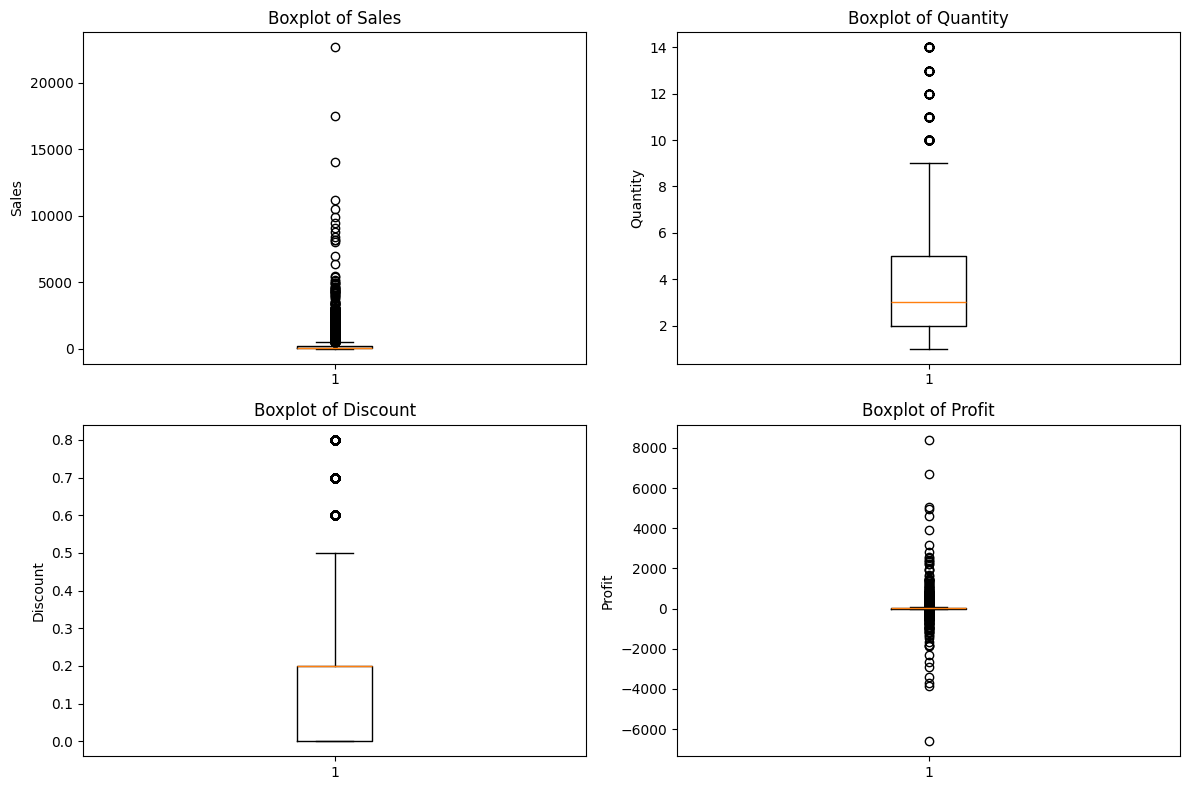

In [14]:
# Generate boxplots for 'Sales', 'Quantity', 'Discount', and 'Profit'
plt.figure(figsize=(12, 8))

# Boxplot for Sales
plt.subplot(2, 2, 1)
plt.boxplot(df['Sales'])
plt.title('Boxplot of Sales')
plt.ylabel('Sales')

# Boxplot for Quantity
plt.subplot(2, 2, 2)
plt.boxplot(df['Quantity'])
plt.title('Boxplot of Quantity')
plt.ylabel('Quantity')

# Boxplot for Discount
plt.subplot(2, 2, 3)
plt.boxplot(df['Discount'])
plt.title('Boxplot of Discount')
plt.ylabel('Discount')

# Boxplot for Profit
plt.subplot(2, 2, 4)
plt.boxplot(df['Profit'])
plt.title('Boxplot of Profit')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()

**Insights :**
1. `Sales` : Terdapat banyak _Outliers_ pada kolom _Sales_. Namun di sini datanya sudah benar dalam artian tidak ada _Sales_ yang kurang dari 0. Namun tetap akan dilakukan pengecekan untuk melihat apakah layak dikurangi outliersnya atau tidak.
2. `Quantity` : Memang terdapat _Outliers_ di sini, namun sama seperti Sales, tidak ada _Quantity_ atau jumlah produk penjualan yang kurang dari 0 atau negatif.
3. `Discount` : Data sudah benar, tidak ada _discount_ kurang dari 0, dan maksimal diskon di sini adalah 80%.
4. `Profit` : Terdapat profit yang menjulang tinggi yang melewati $8000 namun hanya sedikit, dan terdapat profit negatif. Akan dilakukan pengecekan untuk kolom profit ini.

Setelah mengetahui _Outliers_ pada kolom `Sales`, `Quantity`, `Discount`, dan `Profit`. Diketahui kolom yang perlu pengecekan lebih lanjut adalah `Sales` dan `Profit`, yang dimana terdapat sangat banyak _Outliers_. Berikut adalah tahapan pengecekan _Outliers_ `Sales` dan `Profit`.

### Outliers Sales

Kita akan melakukan pengecekan dengan metode IQR (Interquartile Range).

In [15]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_sales = df['Sales'].quantile(0.25)
Q3_sales = df['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

# Define outlier thresholds
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

# Identify outliers
outliers_sales_iqr = df[(df['Sales'] < lower_bound_sales) | (df['Sales'] > upper_bound_sales)]

# Calculate the percentage of outliers
percentage_outliers_sales = len(outliers_sales_iqr) / len(df) * 100

print(f"Total Outliers : {len(outliers_sales_iqr)}")
print(f"Percentage of outliers in the Sales column: {percentage_outliers_sales:.2f}%")

Total Outliers : 1167
Percentage of outliers in the Sales column: 11.68%


Karena _Outliers_ pada kolom _Sales_  mencapai 11.68%, kita tidak akan memotong semuanya untuk mendapatkan data yang lebih bersih, namun kita akan melakukan pengecekan terlebih dahulu, apakah ini adalah salah entry atau tidak.

In [16]:
# Identify outliers
sales_outliers_df = df[(df['Sales'] < lower_bound_sales) | (df['Sales'] > upper_bound_sales)]

# Display the first few rows of the new dataframe containing only sales outliers
print(f'Total Outliers berdasarkan kolom Sales adalah : {len(sales_outliers_df)}')
sales_outliers_df.head()

Total Outliers berdasarkan kolom Sales adalah : 1167


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
7,8,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
10,11,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,43NZ37VE2D,1706.1840,9,0.20,85.3092
11,12,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,JG14MOU94R,911.4240,4,0.20,68.3568


In [17]:
# Summary statistics for sales outliers
sales_outliers_df['Sales'].describe()

count     1167.000000
mean      1266.052104
std       1419.107804
min        499.168000
25%        631.960000
50%        866.400000
75%       1346.502500
max      22638.480000
Name: Sales, dtype: float64

- Tidak terlihat tanda-tanda mencurigakan di informasi _outliers_ ini. Tidak ada data kurang dari 0, _missing value_. Jadi bisa kita simpulkan data _outliers_ dari `Sales` ini tidaklah salah _entry_ atau _error_.
- Maksimal `Sales` dari _outliers_ ini adalah $22638.

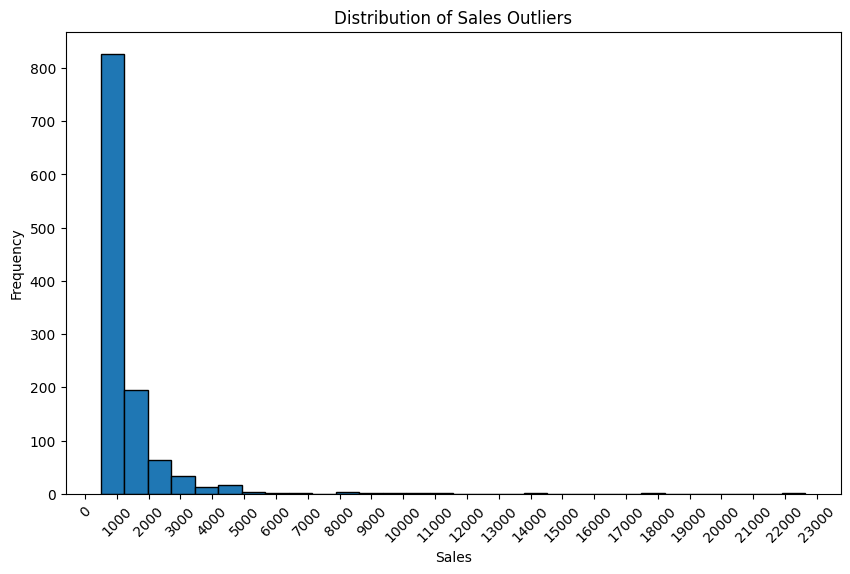

In [18]:
# Plotting the distribution of sales outliers
plt.figure(figsize=(10, 6))
plt.hist(sales_outliers_df['Sales'], bins=30, edgecolor='k')
plt.title('Distribution of Sales Outliers')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.xticks(range(0, int(sales_outliers_df['Sales'].max()) + 1000, 1000), rotation=45)
plt.show()

Setelah melihat hasil visualisasi dari distribusi _outliers_ dari `Sales`, kita dapat melihat bahwa persebaran terjadi dari rentang sekitar $1000 dollar sampai lebih dari $22000. Persebaran mulai dari $4500 hanya sedikit, oleh karena itu. Kita akan memutuskan untuk menghapus data dengan `Sales` lebih dari $2000 untuk membuat hasil analisa nanti lebih akurat. 

Setelah melakukan penanganan _Outliers_ dengan menimbang jumlah data yang dihapus, kita bisa melihat sebaran data _Outliers_ menjadi lebih teratur. Ingat, kita tidak akan menghapus semuanya karena memang bukan data error dan pertimbangan jumlah data setelah dihapus.

### Outliers Profit

Kita akan melakukan pengecekan dengan metode IQR (Interquartile Range).

In [19]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_profit = df['Profit'].quantile(0.25)
Q3_profit = df['Profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit

# Define outlier thresholds
lower_bound_profit = Q1_profit - 1.5 * IQR_profit
upper_bound_profit = Q3_profit + 1.5 * IQR_profit

# Identify outliers
outliers_profit_iqr = df[(df['Profit'] < lower_bound_profit) | (df['Profit'] > upper_bound_profit)]

# Calculate the percentage of outliers
percentage_outliers_profit = len(outliers_profit_iqr) / len(df) * 100

print(f"Total Outliers : {len(outliers_profit_iqr)}")
print(f"Percentage of outliers in the Profit column: {percentage_outliers_profit:.2f}%")

Total Outliers : 1881
Percentage of outliers in the Profit column: 18.82%


In [20]:
# Identify outliers
profit_outliers_df = df[(df['Profit'] < lower_bound_profit) | (df['Profit'] > upper_bound_profit)]

# Display the first few rows of the new dataframe containing only profit outliers
print(f'Total Outliers berdasarkan kolom Profit adalah : {len(profit_outliers_df)}')
profit_outliers_df.head()

Total Outliers berdasarkan kolom Profit adalah : 1881


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
7,8,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
10,11,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,43NZ37VE2D,1706.1840,9,0.20,85.3092
13,14,AMER-2022-161389,2022-12-06,20221206,Adrian Abraham,Canada,Toronto,AMER,NAMER,Microsoft,1066,Tech,SMB,ContactMatcher,COK66F8IC1,407.9760,3,0.20,132.5922


Karena total _outliers_ dari `Profit` berjumlah sangat besar, kita tidak akan menghapus semuanya karena keakuratan datanya akan menurun. Alasan lainnya adalah, data ini bukanlah data _error_, semuanya bukan salah _entry_ dan tidak ada _missing value_.

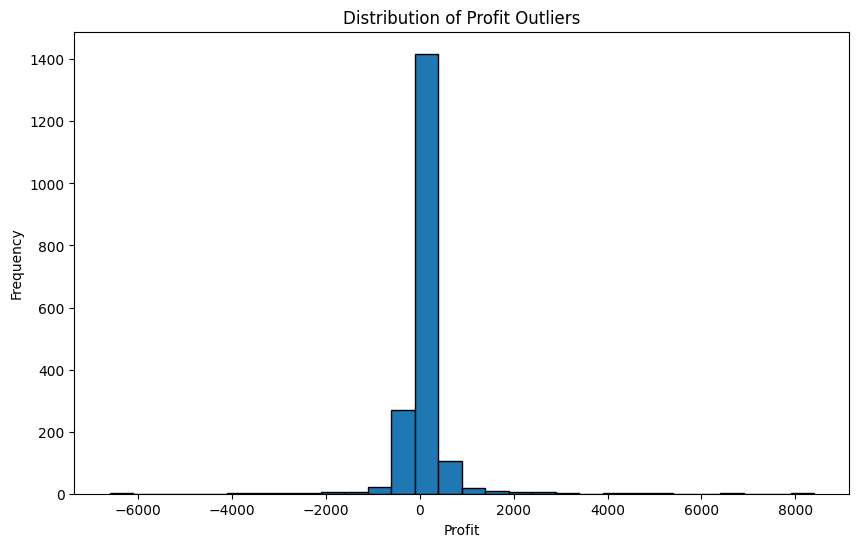

In [21]:
# Plotting the distribution of sales outliers
plt.figure(figsize=(10, 6))
plt.hist(profit_outliers_df['Profit'], bins=30, edgecolor='k')
plt.title('Distribution of Profit Outliers')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

Nantinya kita hanya akan menghapus _outliers_ yang kurang dari $1000 dan lebih dari $2000.

Dataset setelah penanganan Outliers:

In [22]:
# Remove rows where profit is lower than -2000 or higher than 2000
df_cleaned = df[(df['Profit'] >= -1000) & (df['Profit'] <= 2000)]

# Remove rows where sales are more than 2000
df_cleaned = df_cleaned[df_cleaned['Sales'] <= 2000]


In [23]:
len(df_cleaned)

9842

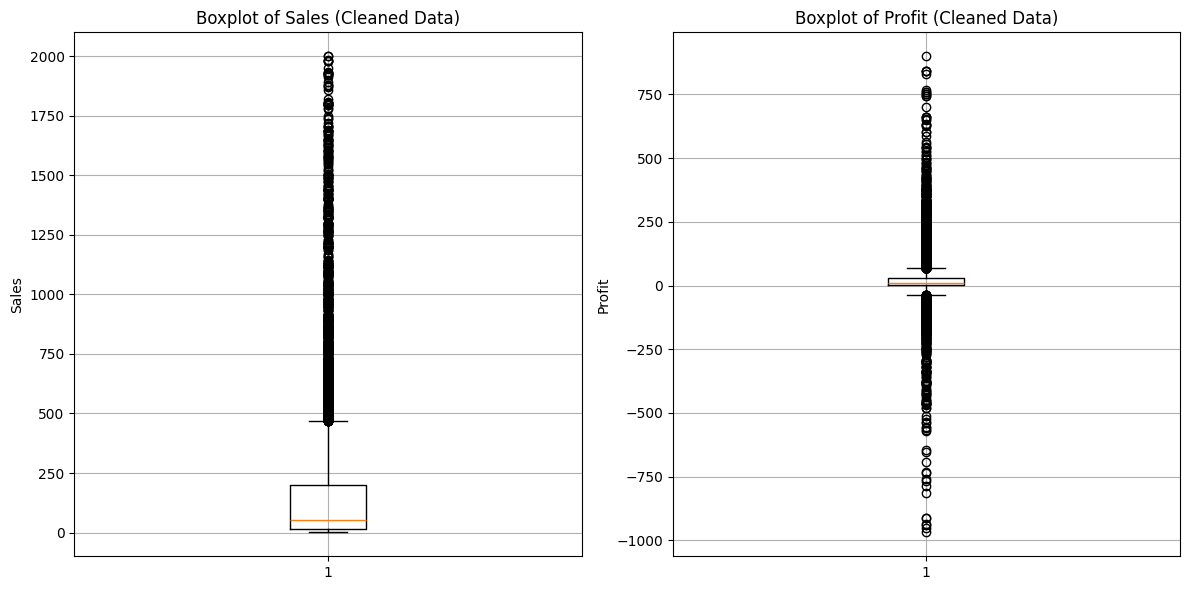

In [24]:
# Generate boxplot for 'Sales' in the cleaned dataframe
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df_cleaned['Sales'])
plt.grid(True)
plt.title('Boxplot of Sales (Cleaned Data)')
plt.ylabel('Sales')

# Generate boxplot for 'Profit' in the cleaned dataframe
plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned['Profit'])
plt.grid(True)
plt.title('Boxplot of Profit (Cleaned Data)')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()

Setelah data dibersihkan, kita dapat melihat bahwa _outliers_ pada kolom `Sales` dan `Profit` memang masih ada, namun sudah lebih teratur persebarannya dibanding sebelum data dibersihkan. Kedepannya kita akan menggunakan data yang sudah dibersihkan ini untuk melakukan analisis, yang diharapkan akan lebih akurat dalam melakukan analisisnya.

## Hapus Kolom Yang Tidak Perlu

In [25]:
df_cleaned = df_cleaned.drop('Row ID',axis=1)

In [26]:
df_cleaned = df_cleaned.drop('Date Key',axis=1)

In [27]:
df_cleaned.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


Kita telah berhasil menghapus kolom yang dirasa tidak perlu, yaitu kolom Row ID, dan kolom Date Key

Ada baiknya kita mengubah kolom dengan nama yang terdapat sapasi (' ') diubah menjadi _underscore_ untuk menghindari kemungkinan masalah yang akan terjadi ke depannya.

## Rename Nama Kolom Dengan Spasi

In [28]:
df_cleaned.rename(columns={'Order ID': 'Order_ID', 'Order Date': 'Order_Date', 'Customer ID': 'Customer_ID', 'Contact Name' : 'Contact_Name'}, inplace=True)
df_cleaned.head()

,Order_ID,Order_Date,Contact_Name,Country,City,Region,Subregion,Customer,Customer_ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


## **Data Yang Sudah Bersih**
Berikut adalah informasi dari data yang sudah dibersihkan :

In [29]:
# Melihat total Unique data 
column_names_cleaned = df_cleaned.columns
unique_counts_cleaned = df_cleaned.nunique()
unique_data_samples_cleaned = [df_cleaned[col].unique() for col in column_names_cleaned] 

unique_data_df_cleaned = pd.DataFrame({
    'Nama Kolom': column_names_cleaned,
    'Total Unik': unique_counts_cleaned,
    'Sample Data Unik': unique_data_samples_cleaned
})

unique_data_df_cleaned = unique_data_df_cleaned.reset_index()
unique_data_df_cleaned.drop(['index'], axis=1)

,Nama Kolom,Total Unik,Sample Data Unik
0,Order_ID,4978,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
1,Order_Date,1235,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 202..."
2,Contact_Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
3,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
4,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
5,Region,3,"[EMEA, AMER, APJ]"
6,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
7,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."
8,Customer_ID,99,"[1017, 1056, 1031, 1065, 1062, 1066, 1074, 108..."
9,Industry,10,"[Energy, Finance, Tech, Healthcare, Manufactur..."


In [30]:
len(df_cleaned)

9842

Sebelum dibersihkan, kita memiliki 19 Kolom, namun sekarang hanya menjadi 17 dikarenakan telah menghapus kolom yang kurang relevan seperti `Row ID` dan `Date Key`. Dan sebelum dibersihkan, kita memiliki 9994 baris. Setelah dibersihkan kita memiliki 9842 baris. Kita juga telah membuat kolom yang memiliki nama dengan spasi (' ') didalamnya diganti dengan _underscore_ ('_').

# **DATA ANALYSIS AND VISUALIZATION**

Kita akan menganalisis dataset ini mulai dari :
1. Tren Penjualan
2. Karakteristik Customer
3. Kontribusi Produk
4. Pengaruh Rate Diskon
5. Lokasi Negara dengan Pertumbuhan _Sales_

## **1. Tren Penjualan**
Pertama-tama kita akan menganalisis Tren Penjualan, mulai dari yang pertama, kita akan melihat berdasarkan tahun.

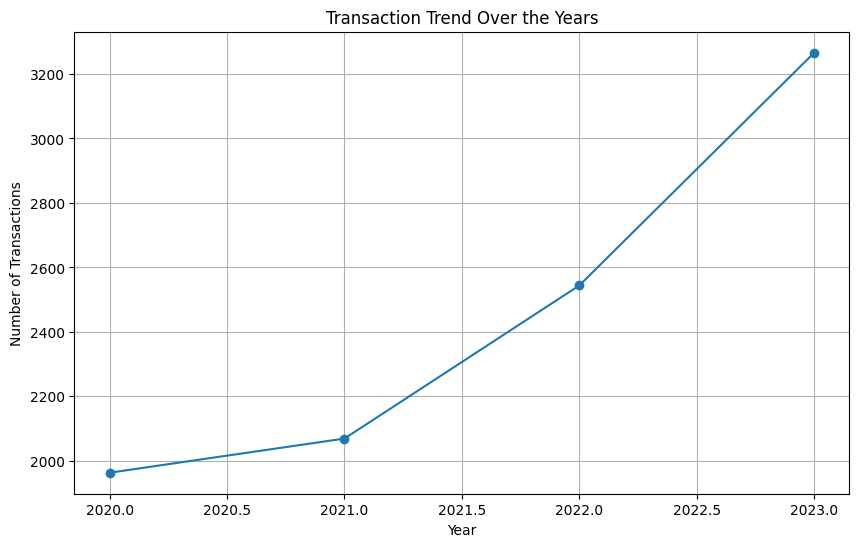

In [31]:
# Convert 'Order Date' to datetime format
df_cleaned['Order_Date'] = pd.to_datetime(df_cleaned['Order_Date'])

# Extract year from 'Order Date'
df_cleaned['Year'] = df_cleaned['Order_Date'].dt.year

# Group by year and count the number of transactions
transaction_trend = df_cleaned.groupby('Year').size().reset_index(name='Transactions')

# Plotting the transaction trend over the years
plt.figure(figsize=(10, 6))
plt.plot(transaction_trend['Year'], transaction_trend['Transactions'], marker='o', linestyle='-')
plt.title('Transaction Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

**Insights :**
- Trend penjualan selalu naik pada setiap tahun.
- Ada sedikit peningkatan jumlah transaksi, mencapai sedikit di atas 2000 pada tahun 2021. Pertumbuhannya tidak terlalu tinggi, namun ini menunjukkan aktivitas bisnis yang stabil atau tanda-tanda awal pertumbuhan.
- Terjadi peningkatan transaksi yang signifikan, dengan jumlah yang hampir mencapai 2.600 transaksi pada tahun 2022.
- Tren kenaikan terus berlanjut, dengan jumlah transaksi mencapai lebih dari 3.200.

Setelah melihat tren transaksi secara tahunan, kita akan melihat tren transaksi dengan jangka waktu bulanan.

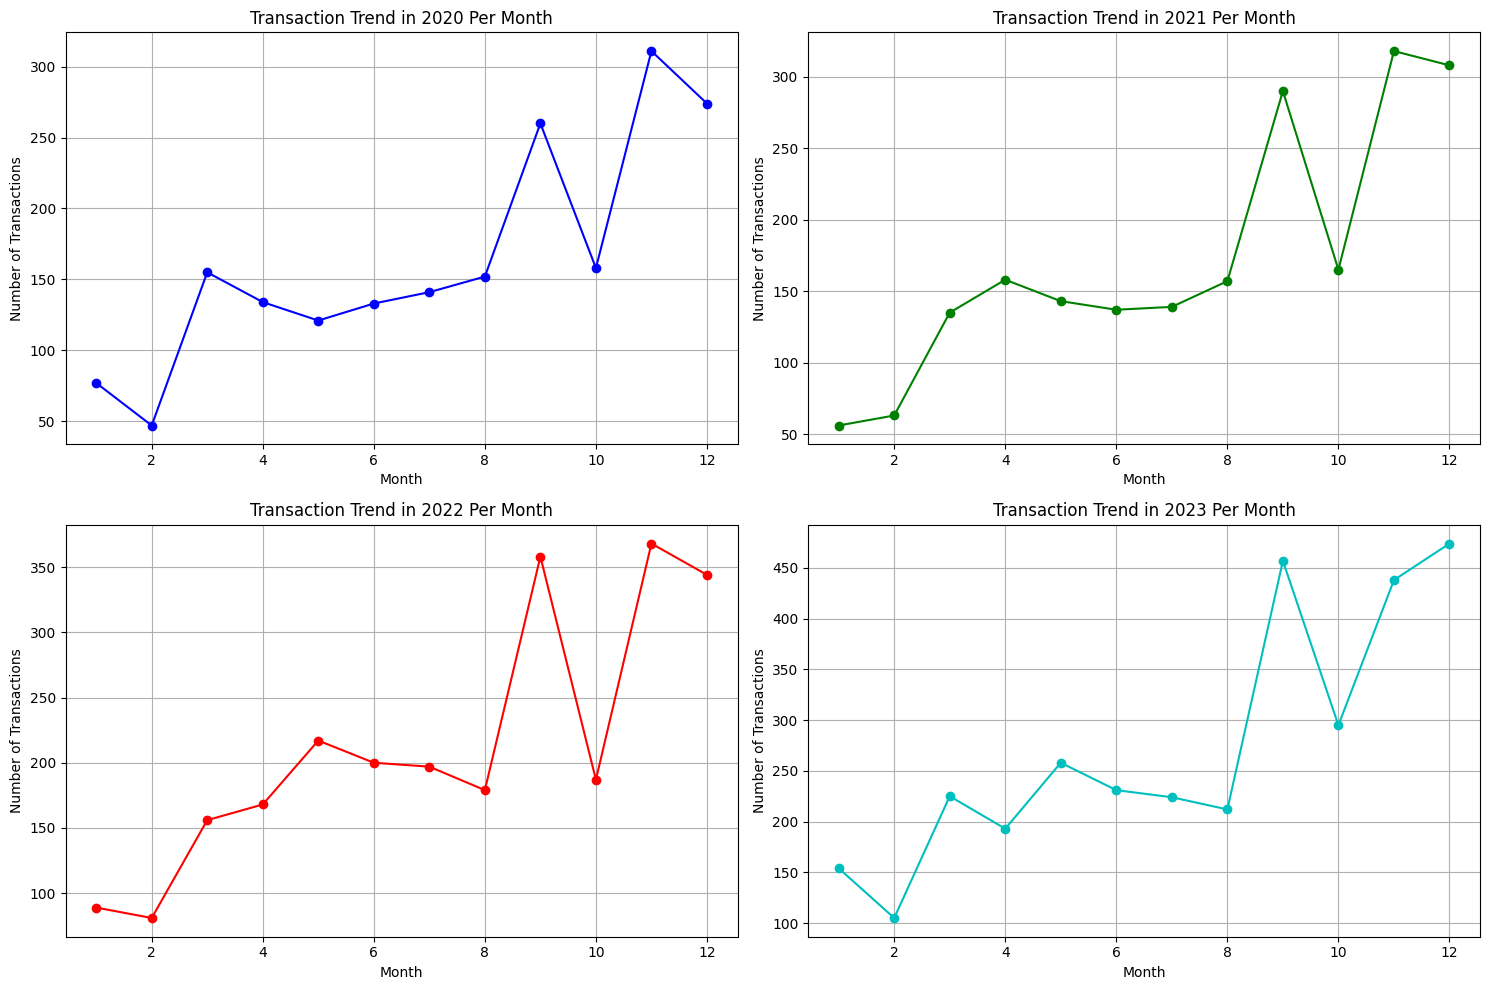

In [32]:
# Extract data for each year
transactions_2020 = df_cleaned[df_cleaned['Year'] == 2020]
transactions_2021 = df_cleaned[df_cleaned['Year'] == 2021]
transactions_2022 = df_cleaned[df_cleaned['Year'] == 2022]
transactions_2023 = df_cleaned[df_cleaned['Year'] == 2023]

transactions_2020['Month'] = transactions_2020['Order_Date'].dt.month
transactions_2021['Month'] = transactions_2021['Order_Date'].dt.month
transactions_2022['Month'] = transactions_2022['Order_Date'].dt.month
transactions_2023['Month'] = transactions_2023['Order_Date'].dt.month

# Group by month and count the number of transactions for each year
transactions_per_month_2020 = transactions_2020.groupby('Month').size()
transactions_per_month_2021 = transactions_2021.groupby('Month').size()
transactions_per_month_2022 = transactions_2022.groupby('Month').size()
transactions_per_month_2023 = transactions_2023.groupby('Month').size()

# Plotting the trends
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Trend per month in 2020
axs[0, 0].plot(transactions_per_month_2020.index, transactions_per_month_2020.values, marker='o', linestyle='-', color='b')
axs[0, 0].set_title('Transaction Trend in 2020 Per Month')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Number of Transactions')
axs[0, 0].grid(True)

# Trend per month in 2021
axs[0, 1].plot(transactions_per_month_2021.index, transactions_per_month_2021.values, marker='o', linestyle='-', color='g')
axs[0, 1].set_title('Transaction Trend in 2021 Per Month')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Number of Transactions')
axs[0, 1].grid(True)

# Trend per month in 2022
axs[1, 0].plot(transactions_per_month_2022.index, transactions_per_month_2022.values, marker='o', linestyle='-', color='r')
axs[1, 0].set_title('Transaction Trend in 2022 Per Month')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Number of Transactions')
axs[1, 0].grid(True)

# Trend per month in 2023
axs[1, 1].plot(transactions_per_month_2023.index, transactions_per_month_2023.values, marker='o', linestyle='-', color='c')
axs[1, 1].set_title('Transaction Trend in 2023 Per Month')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Number of Transactions')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


Dari grafik-grafik di atas, kita bisa menjawab pertanyaan:
- Bagaimana tren penjualan berdasarkan waktu? (bulan, tahun)
     * Berdasarkan tahun:
          + Tren penjualan selalu meningkat setiap tahun. Hal ini berkaitan dengan dipaksa majunya peradaban teknologi dengan adanya masalah pandemi _covid-19_. Kemungkinan bisa terjadi karena semua orang mendapat perlakuan _stay at home_ di 2020, namun hal ini tidak hanya berhenti di 2020, namun _life style_ baru ini melekat hingga tahun setelahnya.
          + Di situasi seperti ini, Amazon sudah siap akan pasar yang akan datang.
     * Berdasarkan bulan:
          + Tren penjualan tiap bulan di setiap tahun selalu fluktuatif, namun menunjukkan tren yang mirip di setiap tahunnya.
          + Lonjakan pada bulan September terjadi dikarenakan Amazon selalu mengadakan _event_ bernama _AWS Innovate Online Conference_.
          + Lalu pada bulan November dan Desember, Amazon juga selalu membuat _best deals_ yang membuat banyak diskon dengan _event_ November _Black Friday_ dan _event_ natal pada bulan Desember.
          + Hampir semua titik terendah setiap bulan selalu terjadi pada bulan Februari (tahun 2021 bukan Februari yang terendah, tetapi bulan Februarinya masih salah satu yang terendah). Hal ini kemungkinan terjadi karena banyaknya kompetitor, salah satunya adalah _IBM Cloud_ yang memiliki lebih banyak promosi di bulan Februari untuk segmen _Enterprise_.

*catatan kaki : **_AWS Innovate Online Conference_** :
Secara singkat ini adalah _event_ konferensi online **gratis** yang bertujuan untuk membantu para profesional dan berbagai organisasi atau industri untuk mendapatkan pengetahuan tentang teknologi.




## **2. Karakteristik Pelanggan**

Setelah mengetahui tren penjualan, sekarang kita akan melihat bagaimana karakteristik dari pelanggan

### A. Dari Transaksi

Kita akan mengelompokkan transaksi dari customer ID dengan jumlah dari Sales dan rata-ratanya, jumlah beli, jumlah dari Profit dan rata-rata profit untuk melihat secara garis besar bagaimana karakteristik customer dari transaksi.

In [33]:
# 1. Purchase Behavior
purchase_behavior = df_cleaned.groupby('Customer_ID').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Profit': ['sum', 'mean']
}).reset_index()
purchase_behavior.columns = ['Customer_ID', 'Total_Sales', 'Avg_Sales', 'Purchase_Count', 'Total_Profit', 'Avg_Profit']


In [34]:
purchase_behavior_sorted = purchase_behavior.sort_values(by='Total_Sales', ascending=False)

purchase_behavior_sorted

,Customer_ID,Total_Sales,Avg_Sales,Purchase_Count,Total_Profit,Avg_Profit
8,1009,33936.6924,196.165852,173,5518.6797,31.899883
85,1088,31861.9300,176.032762,181,338.9030,1.872392
77,1080,31527.3450,166.811349,189,4673.6872,24.728504
4,1005,30514.9710,224.374787,136,3996.2829,29.384433
10,1011,30203.8135,235.967293,128,4820.2775,37.658418
...,...,...,...,...,...,...
82,1085,7548.4790,157.259979,48,879.8053,18.329277
11,1012,7100.9290,182.075103,39,812.7311,20.839259
76,1079,6633.1370,170.080436,39,472.4582,12.114313
26,1027,5402.9020,101.941547,53,-13.9695,-0.263575


**Insights :**
- Di atas adalah 10 Pelanggan teratas dan 10 Pelanggan terbawah.
- Frekuensi dan Nilai Pembelian:
    * Pelanggan dengan jumlah pembelian yang lebih tinggi umumnya memiliki total penjualan (_total sales_) yang lebih tinggi.
    * Rata-rata penjualan dan rata-rata keuntungan per transaksi dapat bervariasi secara signifikan di antara para pelanggan.
- Profit:
    * Beberapa pelanggan menghasilkan total keuntungan (_profit_) yang lebih tinggi karena frekuensi pembelian (_purchase count_) yang tinggi atau nilai penjualan rata-rata (_average profit_) yang tinggi.

In [35]:
purchase_behavior.to_csv('purchase_behavior.csv')

Selanjutnya kita akan melihat persebaran total _sales_ ,dan rata-rata sales dengan total profit. Hal ini bertujuan untuk melihat korelasinya.

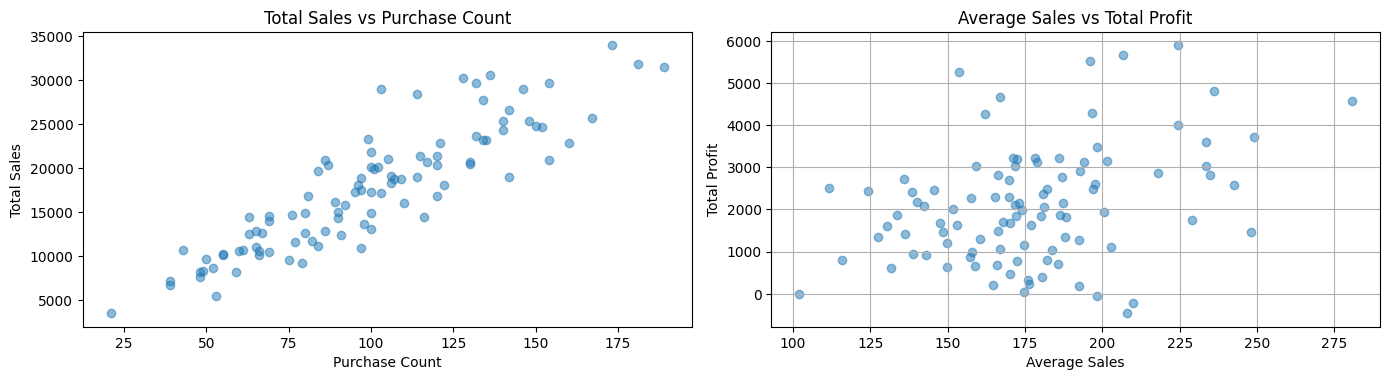

In [36]:
# Visualizing Purchase Behavior
plt.figure(figsize=(14, 7))

# Total Sales vs Purchase Count
plt.subplot(2, 2, 1)
plt.scatter(purchase_behavior['Purchase_Count'], purchase_behavior['Total_Sales'], alpha=0.5)
plt.title('Total Sales vs Purchase Count')
plt.xlabel('Purchase Count')
plt.ylabel('Total Sales')

# Average Sales vs Total Profit
plt.subplot(2, 2, 2)
plt.scatter(purchase_behavior['Avg_Sales'], purchase_behavior['Total_Profit'], alpha=0.5)
plt.title('Average Sales vs Total Profit')
plt.xlabel('Average Sales')
plt.grid(True)
plt.ylabel('Total Profit')

plt.tight_layout()
plt.show()

**Insights :**
- _Total Sales_ vs _Purchase Count_ :
    + Terdapat korelasi positif yang jelas antara jumlah pembelian dan total penjualan. Ketika jumlah pembelian meningkat, total penjualan juga meningkat. Hal ini menunjukkan bahwa pelanggan yang melakukan lebih banyak pembelian cenderung membelanjakan lebih banyak secara keseluruhan.
- _Average Sales_ vs _Total Profit_ :
    + Plot menunjukkan korelasi positif yang lemah antara rata-rata penjualan dan total laba. Terdapat beberapa penyebaran, yang mengindikasikan bahwa meskipun penjualan rata-rata yang lebih tinggi dapat menghasilkan total laba yang lebih tinggi, namun ini bukanlah hubungan yang kuat. Hal ini menunjukkan bahwa ada faktor lain yang mungkin mempengaruhi total profit.

Untuk itu mari kita melihat persebaran total pembelian dan total sales.

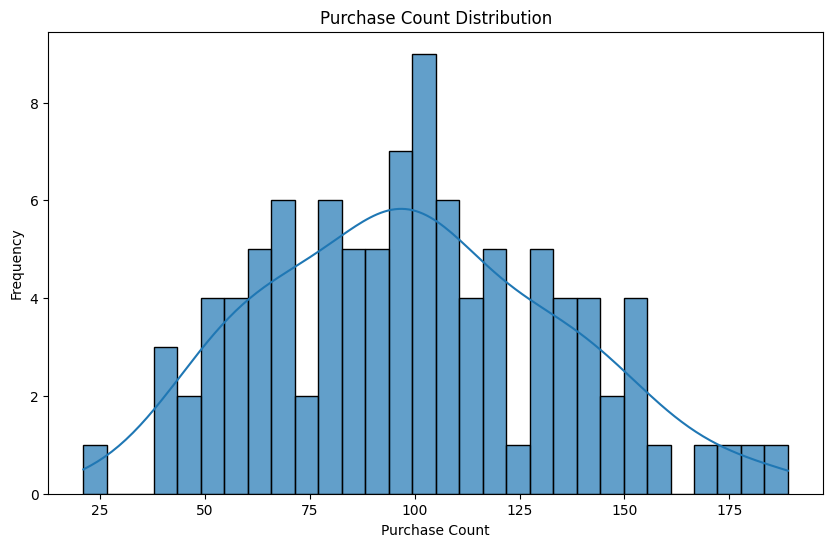

In [37]:
# Purchase Count Distribution

# Plotting the histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(purchase_behavior['Purchase_Count'], bins=30, kde=True, edgecolor='k', alpha=0.7)
plt.title('Purchase Count Distribution')
plt.xlabel('Purchase Count')
plt.ylabel('Frequency')
plt.show()

**Insights :**
- Distribusi ini sedikit miring ke kanan (_right skewed_), mengindikasikan bahwa meskipun sebagian besar pelanggan memiliki jumlah pembelian sekitar 100, ada beberapa pelanggan dengan jumlah pembelian yang lebih tinggi. Namun kita perlu memastikan apakah persebaran ini terdistribusi dengan baik atau tidak dengan uji statistik.

##### Uji Statistik Purchase Count

In [38]:
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import normaltest

stats, pval=normaltest(purchase_behavior['Purchase_Count'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

distribusi normal


In [39]:
pval

0.40966936522050557

Karena distribusi normal, kita akan melakukan uji _Saphiro_

In [40]:
import scipy.stats as stats
pval = stats.shapiro(purchase_behavior['Purchase_Count'])[1]

if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Gagal menolak Ho


**Insights :**

Setelah melakukan uji statistik pada distrubusi _purchase count_ kita dapat memastikan, bahwa distribusi dari jumlah pembelian (_purchase count_) itu normal. Hal ini wajar karena pembelian di bawah _peak_ nya yaitu 100 cenderung sedikit karena harga barangnya yang tergolong tinggi, sehingga _customer_ akan cenderung hanya dapat melakukan pembelian dengan sedikit banyaknya. Begitu pula dengan total jumlah pembelian di atas 100 cenderung rendah karena kuantitas barang yang dibeli semakin banyak, semakin tinggi pula harga yang harus dibayar seiring banyaknya kuantitas barang yang dibeli.

##### Uji Statistik Average Sales vs Total Profit

In [41]:
stats_avgSales, pval_avgSales=normaltest(purchase_behavior['Total_Profit'])
if pval_avgSales<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


In [42]:
# Spearman Correlation
spearman_corr, spearman_p_value = stats.spearmanr(purchase_behavior['Avg_Sales'], purchase_behavior['Total_Profit'])


In [43]:
spearman_p_value

0.0026592425823214146

In [44]:
if spearman_p_value <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


**Insights :**
1. Hipotesis nol (H0) ditolak, yang berarti terdapat hubungan yang signifikan antara rata-rata penjualan dan total laba.
2. Hal ini mengimplikasikan bahwa perubahan dalam penjualan rata-rata (_average sales_) berhubungan dengan perubahan dalam total laba (_total profit_).
3. Tedapat beberapa profit negatif yang mungkin bisa terjadi karena diskon yang salah tidak menentu yang akan kita telusuri nantinya.

Setelah mendapat informasi tentang bagaimana karakteristik pelanggan dengan sudut pandang transaksi sales dan profit, kita akan melihat dari segi segmen.

### B. Dari Segmen

Kita akan melihat total sales dari tiap-tiap segmen.

In [45]:
# Group by segment to analyze total sales
segment_sales = df_cleaned.groupby('Segment').agg({
    'Sales': 'sum'
}).reset_index().sort_values(by='Sales', ascending=False)

segment_sales

,Segment,Sales
1,SMB,886021.8004
2,Strategic,549443.8278
0,Enterprise,304329.1435


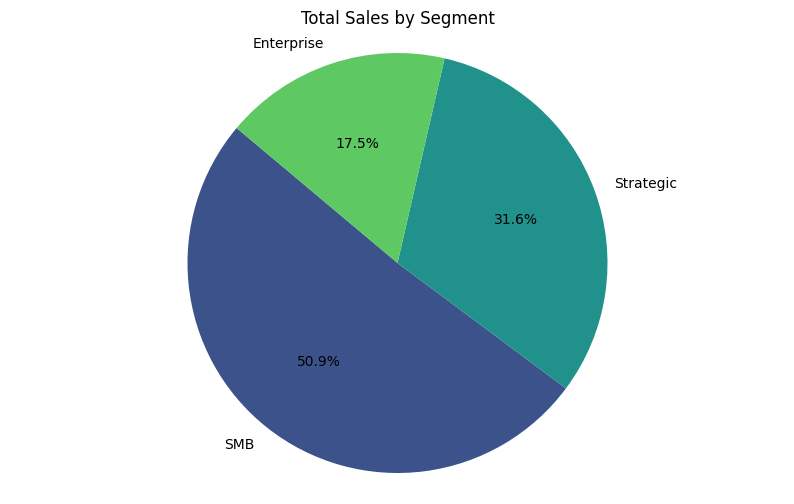

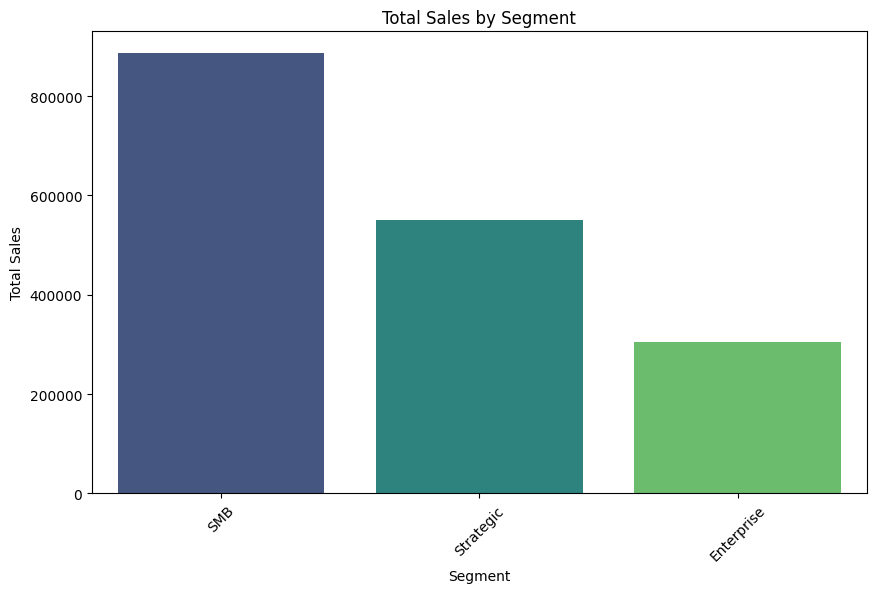

In [46]:
# Plot the total sales by segment as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(segment_sales['Sales'], labels=segment_sales['Segment'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(segment_sales)))
plt.title('Total Sales by Segment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Plot the total sales by segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=segment_sales, palette='viridis')
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


**Insights:**
- Total _sales_ terbesar dipegang oleh _segment_ SMB (Small Medium Bussiness) dengan total sales 50.9% dari keseluruhan Sales, lalu diikuti oleh _segment_ Strategic dengan total 31.6%, lalu yang paling kecil oleh _segment_ Enterprise dengan 17.5% dari _total sales_.
- Dari data di atas kita dapat melihat bahwa total _sales_ terbanyak dipegang oleh SMB degan jumlah $886,021.80, dan terendah oleh segmen _enterprise_ dengan jumlah $304,329.14.
- Segmen _SMB_ menjadi yang teratas bisa jadi karena mungkin berada dalam fase pertumbuhan ketika mereka berinvestasi lebih besar pada produk dan layanan untuk meningkatkan skala operasi mereka.
- Kondisi ekonomi mungkin menguntungkan UKM, dengan tersedianya lebih banyak dana atau dukungan keuangan untuk usaha kecil dan menengah, sehingga menyebabkan daya beli lebih tinggi.
- Perusahaan-perusahaan (_Enterprises_) mungkin berada dalam fase pemotongan biaya atau pengurangan pengeluaran, sehingga mempengaruhi volume pembelian mereka.

Setelah mengetahui karakteristik pelanggan berdasarkan segmen, kita akan melihat karakteristiknya berdasarkan industri.

### C. Dari Industry

Pertama-tama kita akan mengelompokkan berdasarkan Industry dan Segmennya agar terlihat lebih jelas, dengan jumlah dari Salesnya.

In [47]:
# Group by industry and segment to analyze total sales
industry_segment_sales = df_cleaned.groupby(['Industry', 'Segment']).agg({
    'Sales': 'sum'
}).reset_index().sort_values(by='Sales', ascending=False)

industry_segment_sales

,Industry,Segment,Sales
10,Finance,SMB,198363.1658
11,Finance,Strategic,124163.9694
13,Healthcare,SMB,111444.6412
16,Manufacturing,SMB,103506.9534
4,Consumer Products,SMB,100909.7378
7,Energy,SMB,98713.2776
25,Tech,SMB,96543.4430
22,Retail,SMB,89483.1605
8,Energy,Strategic,88207.8418
26,Tech,Strategic,74413.7189


Sekarang akan melakukan pivot, agar terlihat lebih jelas kolom dan baris berdasarkan kolom segmen, dan baris industrinya.

In [48]:
# Pivot the data for better visualization
industry_segment_pivot = industry_segment_sales.pivot(index='Industry', columns='Segment', values='Sales')
industry_segment_pivot

Segment,Enterprise,SMB,Strategic
Industry,,,
Communications,20984.4940,38334.4055,41958.7050
Consumer Products,15181.4770,100909.7378,58101.5314
Energy,39571.3875,98713.2776,88207.8418
Finance,50026.9766,198363.1658,124163.9694
Healthcare,29505.9460,111444.6412,46500.4640
Manufacturing,51122.9130,103506.9534,67213.2408
Misc,12692.8606,3456.0270,2332.9220
Retail,32219.5370,89483.1605,38078.4245
Tech,40712.7418,96543.4430,74413.7189


<Figure size 1400x800 with 0 Axes>

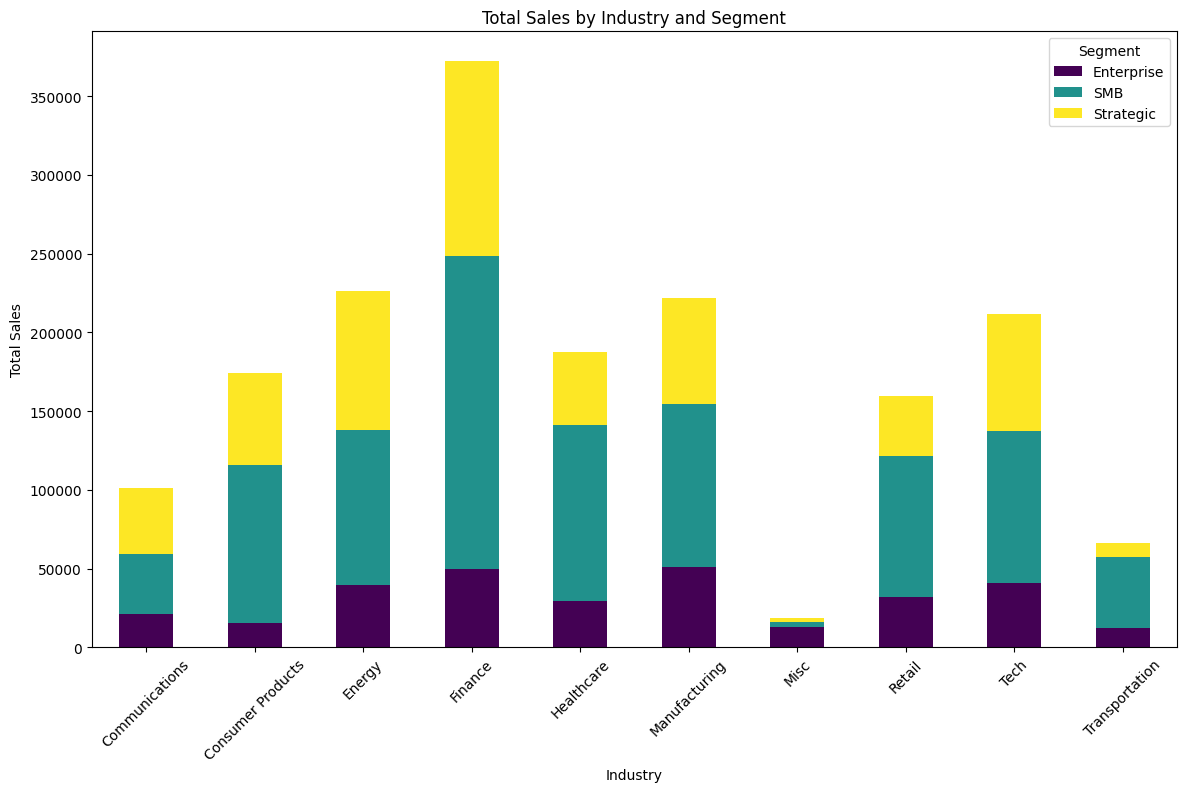

In [49]:
# Plot the total sales by industry and segment
plt.figure(figsize=(14, 8))
industry_segment_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Total Sales by Industry and Segment')
plt.xlabel('Industry')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.show()

**Insights :**
- Tidak disangka Industri _Finance_ memimpin dengan total penjualan tertinggi, secara signifikan melampaui industri lainnya termasuk industri _Tech_. Industri ini sangat kuat di segmen UKM dan Strategis.
- Namun industri teknologi juga menunjukkan total penjualan yang tinggi, dengan distribusi yang menonjol di semua segmen.
- Segmen UKM sangat dominan di beberapa industri, termasuk _Finance_, _Energy_, _Healthcare_, dan _Manufacture_. Hal ini menunjukkan daya tarik pasar yang luas dan kontribusi yang signifikan terhadap total penjualan.
- Meskipun segmen _enterprise_ memberikan kontribusi yang lebih kecil dibandingkan dengan segmen UKM dan Strategis, segmen ini masih memiliki kehadiran yang menonjol di industri seperti Keuangan, Manufaktur, dan Teknologi.

In [50]:
# Filter for high-value clients in the Strategic segment
high_value_clients_strategic = df_cleaned[df_cleaned['Segment'] == 'Strategic']

# Group by Customer and calculate total sales and profit
high_value_clients_summary = high_value_clients_strategic.groupby('Customer').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index().sort_values(by='Sales', ascending=False)

# Get the top 10 high-value clients based on total sales
top_5_high_value_clients_strategic = high_value_clients_summary.head(5)

top_5_high_value_clients_strategic

,Customer,Sales,Profit
84,Valero Energy,15327.1928,1974.6073
7,American Express,15301.4200,1780.5304
86,Volkswagen,14785.7220,3475.8351
4,Allianz,14537.6600,2078.5214
73,Sony,14437.7820,1132.1541


Dari grafik-grafik di atas kita dapat menjawab pertanyaan:
- Bagaimana karakteristik mereka?
    - Dari Transaksi:
        + Pelanggan dengan jumlah pembelian yang lebih tinggi (di atas 100) merupakan kontributor utama terhadap total penjualan, sering kali melebihi $20,000 pada _sales_.
        + Pelanggan bervolume tinggi (mereka yang melakukan banyak pembelian) sangat penting untuk mendorong total _sales_.
        + Profitabilitas tidak secara langsung terkait dengan volume penjualan saja, menunjukkan bahwa faktor-faktor lain (misalnya, diskon, jenis pelanggan) mempengaruhi margin keuntungan.
    - Dari _Segment_:
        + Segmen SMB mendominasi penjualan dengan total tertinggi, menunjukkan bahwa usaha kecil dan menengah adalah basis `pelanggan utama`.
        + Segmen Enterprise berkontribusi lebih kecil daripada segmen UKM dan Strategis, namun tetap merupakan bagian penting dari basis pelanggan.
        + Segmen strategis, meskipun lebih sedikit, memberikan porsi penjualan yang signifikan, menunjukkan upaya yang terfokus pada klien bernilai tinggi seperti _Valero Energy_, _American Express_, _Volkswagen_, dan _Allianz_ yang memiliki _Sales_ rata-rata menyentuk $15,000.
    - Dari Industri :
        + Dari sisi industri, sektor _finance_, _energy_, dan _tech_ sangat penting, dengan pelanggan yang sebagian besar berasal dari segmen SBM dan Strategic.
        + Industri kesehatan dan produk konsumen mewakili peluang pertumbuhan, yang mengindikasikan potensi ekspansi di sektor-sektor ini.
        + Pelanggan dari industri ini cenderung mendorong penjualan di masa depan dan harus ditargetkan dengan penawaran khusus.


## **3. Kontribusi Produk**

Setelah melakukan pengamatan terkai karakteristik dari pelanggan, kita akan masuk ke tahap selanjutnya, yaitu tahap analisis kontribusi produk.\
Pertama-tama, kita akan mengelompokkan Produk berdasarkan jumlah sales, jumlah quantity, dan juga jumlah profit.

In [51]:
product_sales = df_cleaned.groupby('Product').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum'
}).reset_index()

# Identify the products with the highest sales and revenue contribution
top_products_by_sales = product_sales.sort_values(by='Sales', ascending=False).head(10)
top_products_by_profit = product_sales.sort_values(by='Profit', ascending=False).head(10)

In [52]:
top_products_by_sales

,Product,Sales,Quantity,Profit
5,FinanceHub,291749.9360,3626,26572.9500
11,Site Analytics,290753.1280,3197,37636.2491
3,ContactMatcher,276911.1000,6932,-2204.3166
7,Marketing Suite - Gold,216238.3180,3142,19282.3509
4,Data Smasher,155198.1180,2932,38895.8843
13,Support,95130.5960,5797,34009.2532
8,OneView,94911.0130,1682,15815.0963
9,SaaS Connector Pack,91705.1640,3563,13059.1436
6,Marketing Suite,89193.3727,818,-2876.5150
0,Alchemy,46238.8880,137,13974.6680


Masuk ke tahap visualisasi dari top 10 produk berdasarkan penjualan.

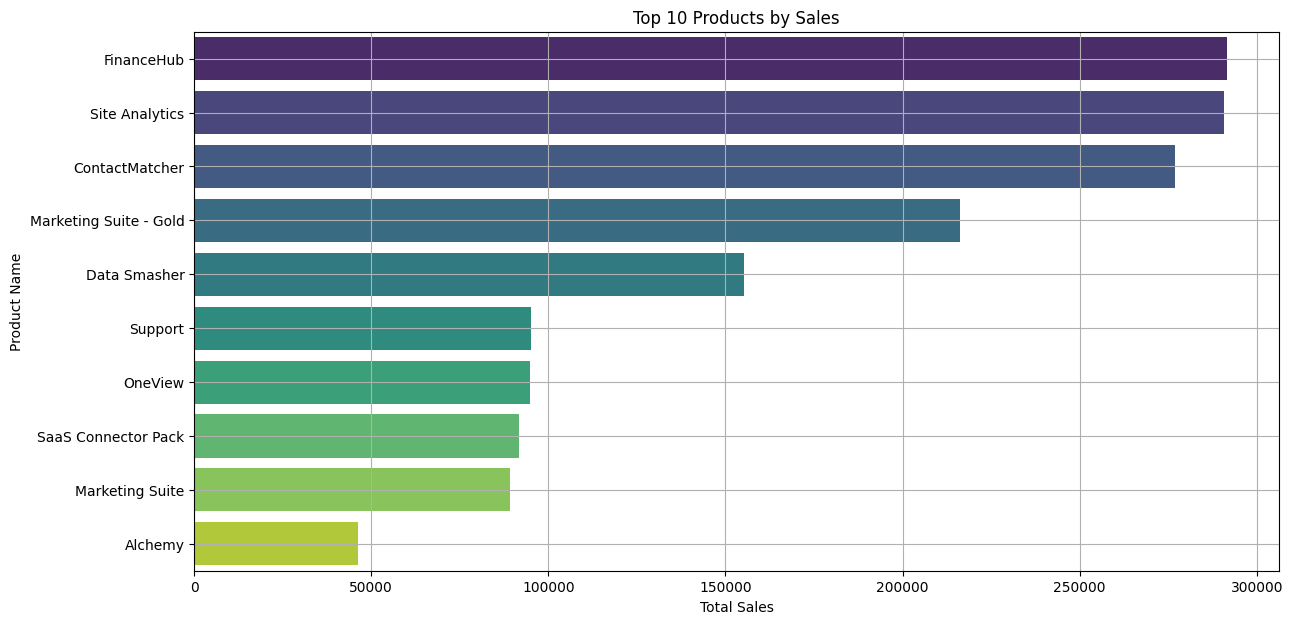

In [53]:
# Visualization for Top Products by Sales
plt.figure(figsize=(14, 7))
sns.barplot(x='Sales', y='Product', data=top_products_by_sales, palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.grid(True)
plt.show()

**Insights :**
- FinanceHub dengan dan Site Analytics adalah produk yang menonjol dengan total penjualan hampir $300000, bersama-sama berkontribusi secara signifikan terhadap penjualan secara keseluruhan. Ini harus diprioritaskan untuk strategi pemasaran dan penjualan.
- Product Alchemy dengan total penjualan $46238 menjadi yang terendah dibanding yang lain.

Kita akan melakukan pengecekan, apakah ada pola atau tren dalam produk ini.

<Figure size 1400x1000 with 0 Axes>

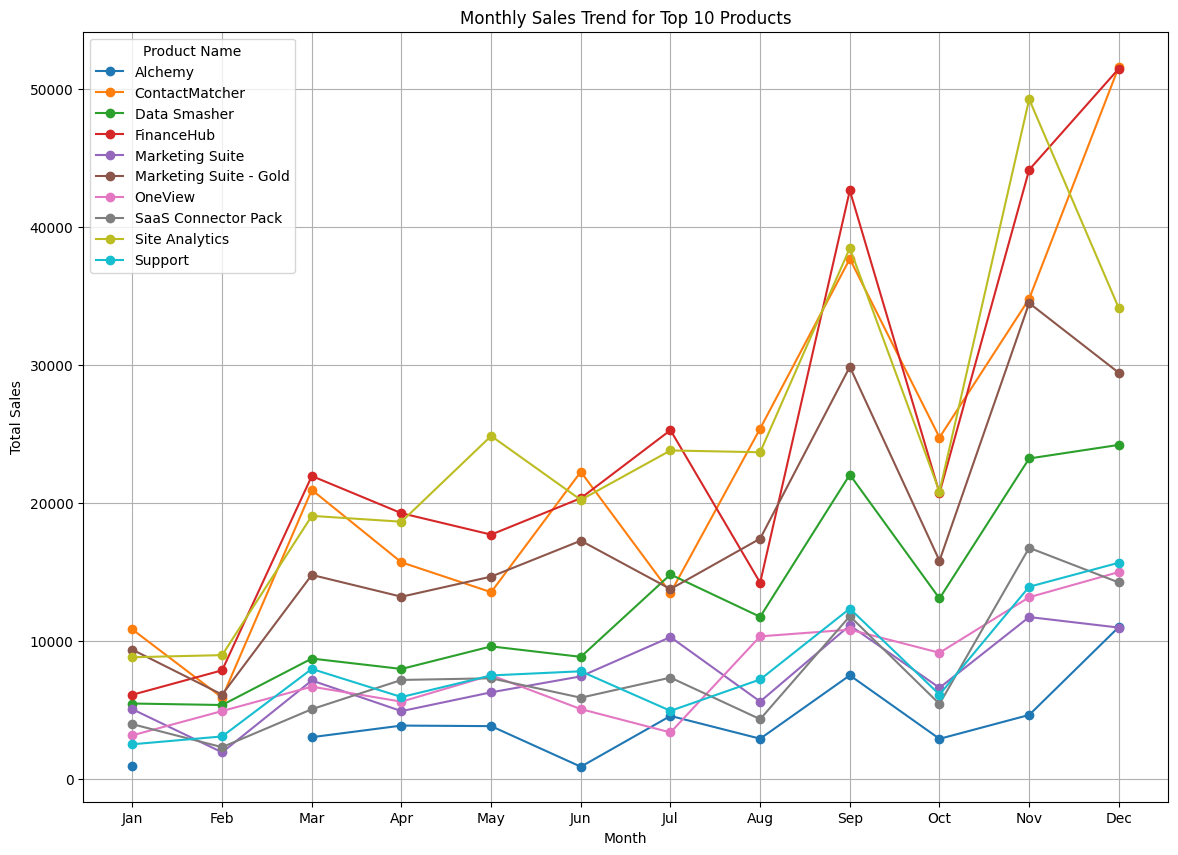

In [54]:
# Group by month and year to analyze seasonal patterns in product sales
df_cleaned['Month'] = df_cleaned['Order_Date'].dt.month

top_products = df_cleaned.groupby('Product').agg({
    'Sales': 'sum'
}).reset_index().sort_values(by='Sales', ascending=False).head(10)['Product']

# Filter data for top 10 products
top_products_sales = df_cleaned[df_cleaned['Product'].isin(top_products)]

# Group by product name and month to get the total sales
monthly_sales_top_products = top_products_sales.groupby(['Product', 'Month']).agg({
    'Sales': 'sum'
}).reset_index()

# Pivot the data for better visualization
monthly_sales_pivot_top_products = monthly_sales_top_products.pivot(index='Month', columns='Product', values='Sales')

# Plotting monthly sales trends for top 10 products
plt.figure(figsize=(14, 10))
monthly_sales_pivot_top_products.plot(kind='line', marker='o', figsize=(14, 10))
plt.title('Monthly Sales Trend for Top 10 Products')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Product Name')
plt.show()

**Insights :**
- Terdapat trend dalam produk yang terjual setiap bulan (total semua tahun).
- Penjualan umumnya meningkat menjelang akhir tahun, dengan puncaknya pada bulan Agustus, Oktober, dan Desember.
- Banyak produk, seperti Marketing Suite - Gold dan ContactMatcher, menunjukkan lonjakan penjualan yang signifikan di bulan Agustus.
- Pada Oktober dan Desember beberapa produk, termasuk ContactMatcher dan Data Smasher, mengalami penjualan yang tinggi pada bulan-bulan ini, yang mengindikasikan potensi permintaan musiman atau acara promosi.
- Produk Alchemy menunjukkan kinerja yang konsisten sepanjang tahun dengan sedikit peningkatan penjualan menjelang akhir tahun.
- Beberapa produk menunjukkan puncak pada bulan-bulan tertentu, yang mengindikasikan potensi musiman. Sebagai contoh, Marketing Suite - Gold dan ContactMatcher keduanya mencapai puncaknya di bulan Agustus, yang menunjukkan tren musiman yang signifikan.

Setelah mengetahui kontribusi dan pola dari produk berdasarkan sales, sekarang kita akan masuk ke tahap analisa kontribusi dan pola dari produk berdasarkan profit.

In [55]:
top_products_by_profit

,Product,Sales,Quantity,Profit
4,Data Smasher,155198.118,2932,38895.8843
11,Site Analytics,290753.128,3197,37636.2491
13,Support,95130.596,5797,34009.2532
5,FinanceHub,291749.936,3626,26572.9500
7,Marketing Suite - Gold,216238.318,3142,19282.3509
8,OneView,94911.013,1682,15815.0963
0,Alchemy,46238.888,137,13974.6680
9,SaaS Connector Pack,91705.164,3563,13059.1436
10,SaaS Connector Pack - Gold,16476.402,906,6964.1767
2,ChatBot Plugin,27118.792,3000,6527.7870


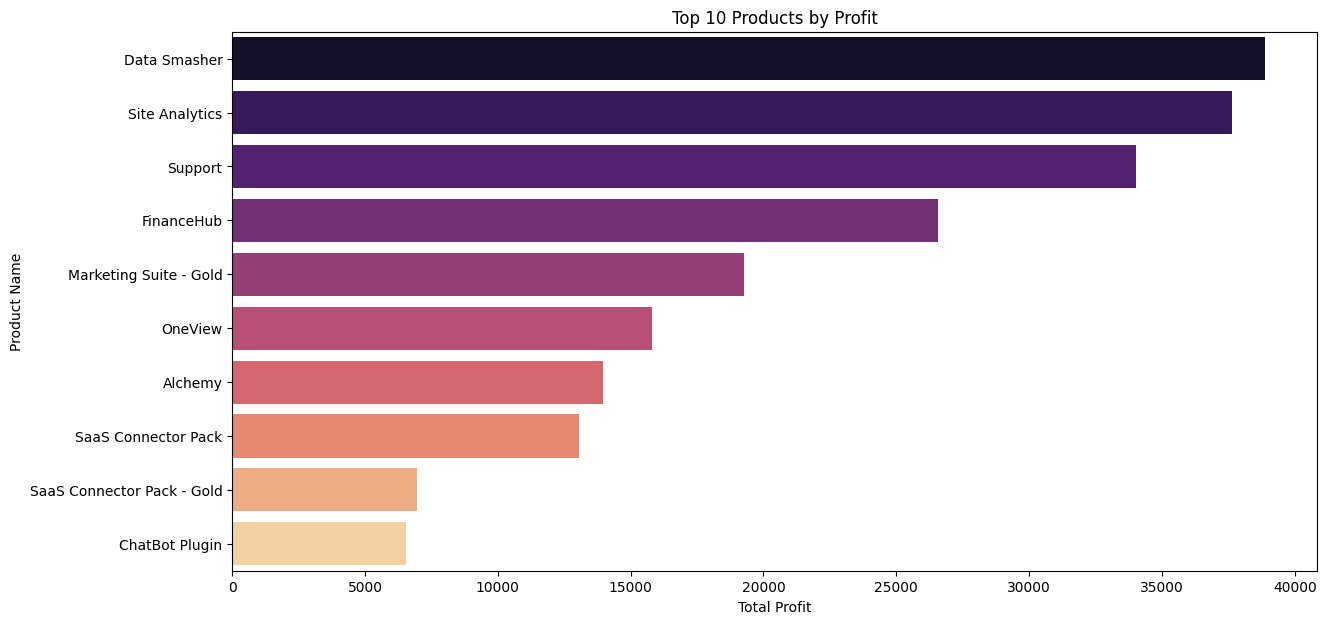

In [56]:
# Visualization for Top Products by Profit
plt.figure(figsize=(14, 7))
sns.barplot(x='Profit', y='Product', data=top_products_by_profit, palette='magma')
plt.title('Top 10 Products by Profit')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()

**Insights :**
- Data Smasher: Produk ini memimpin dengan total keuntungan tertinggi dengan total profit $38895.8843.
- Chatbot Plugin menjadi produk dengan total keuntungan paling rendah diantara 10 yang tertinggi dengan total profit $6527.7870
- Kehadiran berbagai produk dalam 10 besar menunjukkan portofolio yang beragam yang berkontribusi terhadap laba perusahaan. Diversifikasi ini membantu menyeimbangkan aliran pendapatan.

<Figure size 1400x1000 with 0 Axes>

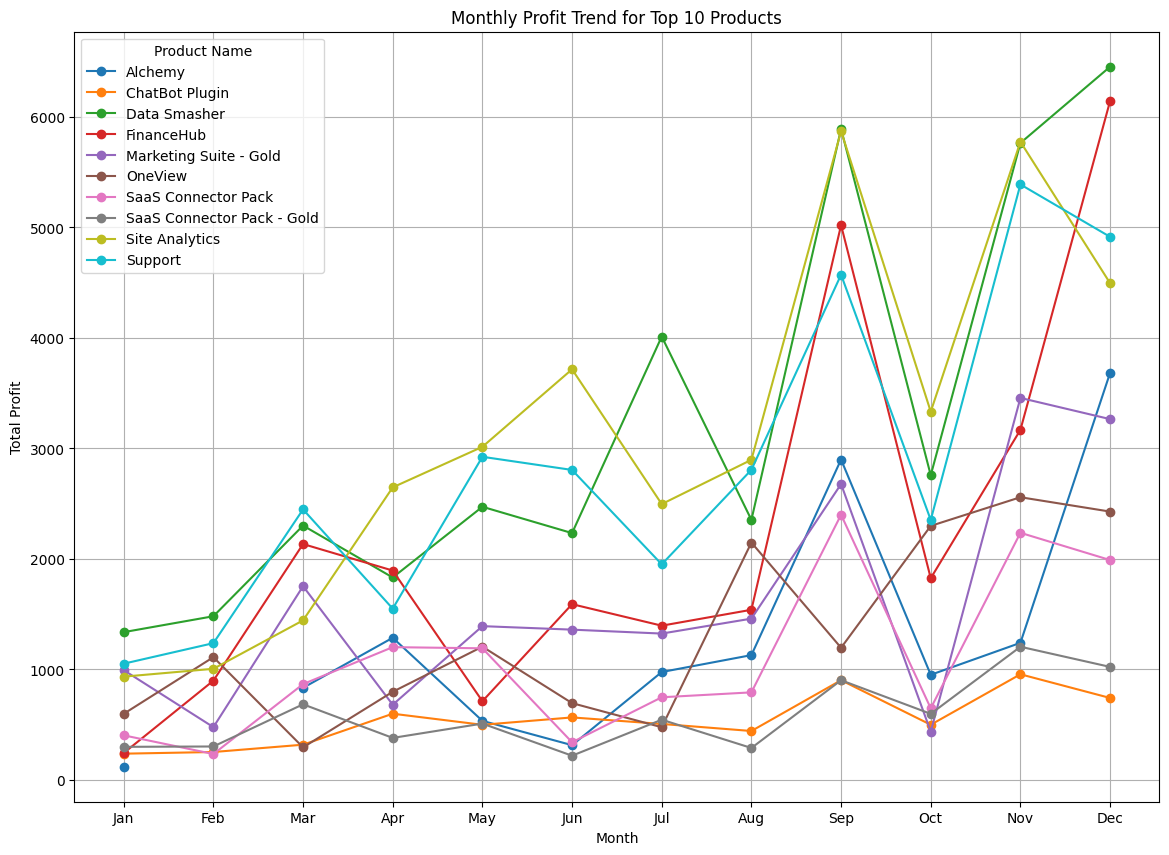

In [57]:
# Identify the top 10 products by total profit
top_products_by_profit = df_cleaned.groupby('Product').agg({'Profit': 'sum'}).reset_index()
top_products_by_profit = top_products_by_profit.sort_values(by='Profit', ascending=False).head(10)['Product']

# Filter data for top 10 products by profit
top_products_profit = df_cleaned[df_cleaned['Product'].isin(top_products_by_profit)]

# Group by product name and month to get the total profit
monthly_profit_top_products = top_products_profit.groupby(['Product', 'Month']).agg({'Profit': 'sum'}).reset_index()

# Pivot the data for better visualization
monthly_profit_pivot_top_products = monthly_profit_top_products.pivot(index='Month', columns='Product', values='Profit')

# Plotting monthly profit trends for top 10 products
plt.figure(figsize=(14, 10))
monthly_profit_pivot_top_products.plot(kind='line', marker='o', figsize=(14, 10))
plt.title('Monthly Profit Trend for Top 10 Products')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Product Name')
plt.show()

**Insights :**
- Keuntungan biasanya mencapai puncaknya pada bulan-bulan tertentu, terutama Agustus, Oktober, dan Desember, yang mengindikasikan permintaan musiman atau promosi yang sukses selama periode-periode ini.
- Agustus Lonjakan laba yang signifikan untuk produk-produk seperti Data Smasher, FinanceHub, dan Site Analytics.
- Oktober: Beberapa produk, termasuk Data Smasher, FinanceHub, dan Site Analytics, menunjukkan keuntungan yang tinggi.
- Desember: Beberapa produk, seperti FinanceHub, Data Smasher, dan Dukungan, menunjukkan kinerja laba yang kuat.

Dari grafik-grafik di atas, kita dapat menjawab pertanyaan :
- Produk manakah yang memiliki penjualan dan kontribusi pendapatan tertinggi dan apakah ada pola atau tren musiman dalam penjualan produk?
    + Produk yang memiliki _Sales_ tertinggi adalah _FinanceHub_. Kombinasi skalabilitas, efisiensi biaya, keamanan, teknologi canggih, jangkauan global, kemampuan integrasi, dan dukungan yang kuat membuat AWS menjadi pilihan yang menarik bagi UKM keuangan. Faktor-faktor ini secara kolektif memungkinkan SMB _Finance_ untuk berinovasi, tumbuh, dan beroperasi secara efisien dengan tetap mempertahankan tingkat keamanan dan kepatuhan yang tinggi.
    + Produk yang berkontribusi tertinggi secara profitabilitas adalah _Data Smasher_. Adalah berbagai alat bantu dan layanan yang terkait dengan pemrosesan data, integrasi, dan analitik. Hal ini wajar saja, karena dimanapun itu, pengolahan data menjadi salah satu kebutuhan penting dalam sebuah usaha dari semua _segment_.
    + Terdapat pola pada tren musiman (bulanan) dalam penjualan produk:
        - Puncak penjualan yang signifikan terjadi sekitar bulan September sampai Desember. Hal ini dapat terjadi karena banyaknya permintaan atau promosi yang sukses pada periode ini. Dikarenakan secara kalender terdapat banyak _event_ yang terjadi pada bulan-bulan tersebut.
        - Pada bulan Feburari sampai Juli, pola dari _sales_ produk terbilang stabil.
    + Terdapat pola pada tren musiman (bulanan) pada profitabilitas produk:
        - Produk seperti Data Smasher dan FinanceHub menunjukkan profitabilitas yang konsisten.
        - Keuntungan mencapai puncaknya secara signifikan pada bulan September sampai Desember, serupa dengan tren _sales_.

## **4. Pengaruh Rate Discount**

Setelah mengetahui bagaimana kontribusi produk dan pola musimannya, kita akan masuk ke tahap analisa pengaruh rate diskon.

Kita akan cek berapa saja diskon di dalam dataset ini.

In [58]:
df_cleaned['Discount'].unique()

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.7 , 0.6 , 0.32, 0.1 , 0.5 , 0.4 ,
       0.15])

Diskon ternyata dimulai dari 0 sampai 80%. Disini kita tidak akan menganggap 0% sebagai diskon., **jadi yang terendah adalah 10%**. Setelah mengetahui rentangnya, kita akan melihat total profit itu dipengaruhi oleh range dari diskon.

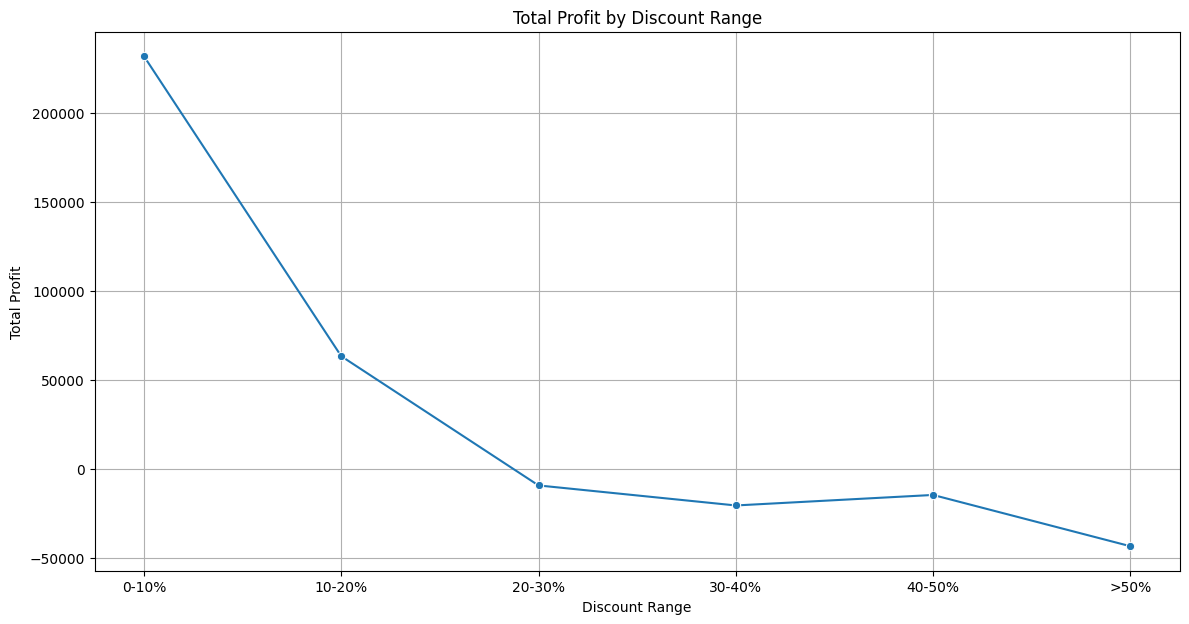

In [59]:
df_cleaned['Discount Rate'] = df_cleaned['Discount']

# Create bins for discount rates
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '>50%']
df_cleaned['Discount Range'] = pd.cut(df_cleaned['Discount Rate'], bins=bins, labels=labels, include_lowest=True)

# Group by discount range to analyze profit
discount_analysis = df_cleaned.groupby('Discount Range').agg({
    'Profit': 'sum'
}).reset_index()

# Plot the relationship between discount rate and total profit
plt.figure(figsize=(14, 7))
sns.lineplot(x='Discount Range', y='Profit', data=discount_analysis, marker='o')
plt.title('Total Profit by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

In [60]:
discount_analysis

,Discount Range,Profit
0,0-10%,231903.5251
1,10-20%,63270.6801
2,20-30%,-9387.9054
3,30-40%,-20644.3553
4,40-50%,-14738.4236
5,>50%,-43561.0124


**Insights :**
- Terdapat tren penurunan yang jelas dalam total profit seiring dengan meningkatnya tingkat diskon.
- Menghasilkan total keuntungan tertinggi dengan total profit $231903.53.
- Mulai tingkat diskon 20% sampai lebih dari 50%, bisa membuat profit penjualan mencapai negatif (merugikan).
- Diskon yang melebihi 50% menghasilkan profit negatif yang signifikan, menunjukkan bahwa diskon yang sangat tinggi merugikan profitabilitas.

Setelah mengetahui pengaruh diskon terhadap total profit, sekarang kita akan mengidentifikasi profit negatif apakah benar-benar berhubungan dengan diskon?

In [61]:
# Identify transactions with negative profit
negative_profit_transactions = df_cleaned[df_cleaned['Profit'] < 0]

In [62]:
# Analyze transactions with negative profit
negative_profit_transactions = df_cleaned[df_cleaned['Profit'] < 0]

# Display the first few rows of negative profit transactions
negative_profit_summary = negative_profit_transactions.describe()

# Group by customer to see if certain customers consistently have negative profit
negative_profit_by_customer = negative_profit_transactions.groupby('Customer').agg({
    'Profit': 'sum',
    'Sales': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean'
}).reset_index()


display(negative_profit_summary, negative_profit_by_customer.head())

,Order_Date,Customer_ID,Sales,Quantity,Discount,Profit,Year,Month,Discount Rate
count,1838,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000
mean,2022-04-28 07:13:15.212187392,1050.255713,195.572202,3.723069,0.479935,-57.524949,2021.718172,7.784004,0.479935
min,2020-01-05 00:00:00,1001.000000,0.444000,1.000000,0.100000,-968.883300,2020.000000,1.000000,0.100000
25%,2021-05-12 12:00:00,1023.000000,12.143000,2.000000,0.200000,-54.593850,2021.000000,5.000000,0.200000
50%,2022-06-15 00:00:00,1050.000000,67.517000,3.000000,0.400000,-17.578550,2022.000000,9.000000,0.400000
75%,2023-05-05 18:00:00,1077.000000,264.086250,5.000000,0.700000,-6.188000,2023.000000,11.000000,0.700000
max,2023-12-31 00:00:00,1101.000000,1931.958000,14.000000,0.800000,-0.089500,2023.000000,12.000000,0.800000
std,NaN,30.157523,289.360077,2.113806,0.235248,110.379688,1.125740,3.298706,0.235248


,Customer,Profit,Sales,Quantity,Discount
0,AT&T,-2277.0337,5120.596,85,0.538000
1,Abbott Laboratories,-408.3120,1239.092,48,0.450000
2,Aetna,-757.7536,4459.980,110,0.472414
3,Airbus,-1236.0287,4120.451,64,0.518750
4,Allianz,-1131.7345,4447.031,103,0.440323


**Insights :**

Dapat disimpulkan bahwa diskon rata-rata yang tinggi (40% ke atas) mungkin menyebabkan laba negatif. Dengan menganalisis faktor ini, bisnis dapat menyesuaikan strategi penetapan harga atau diskon untuk meningkatkan profitabilitas.

Berikutnya kita akan melihat perbandingan dari 

Correlation between Discount and Profit: -0.37
P-value: 0.00


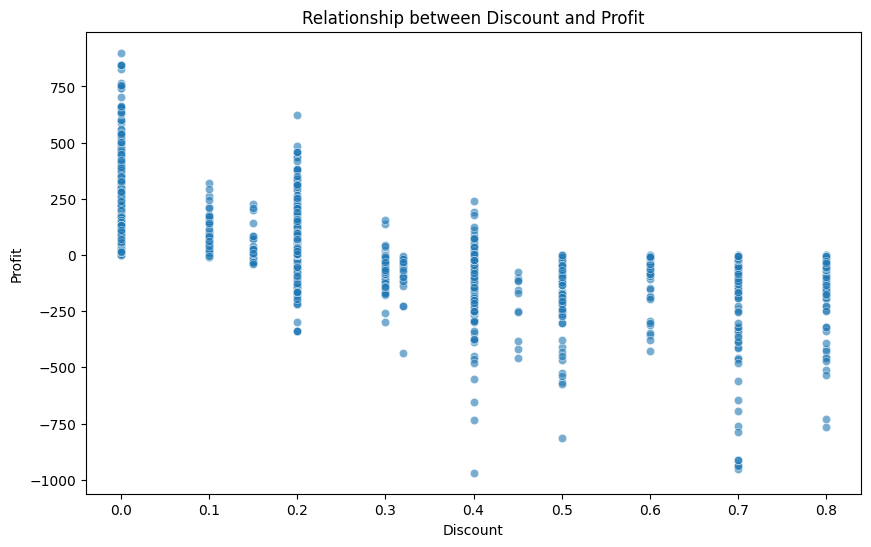

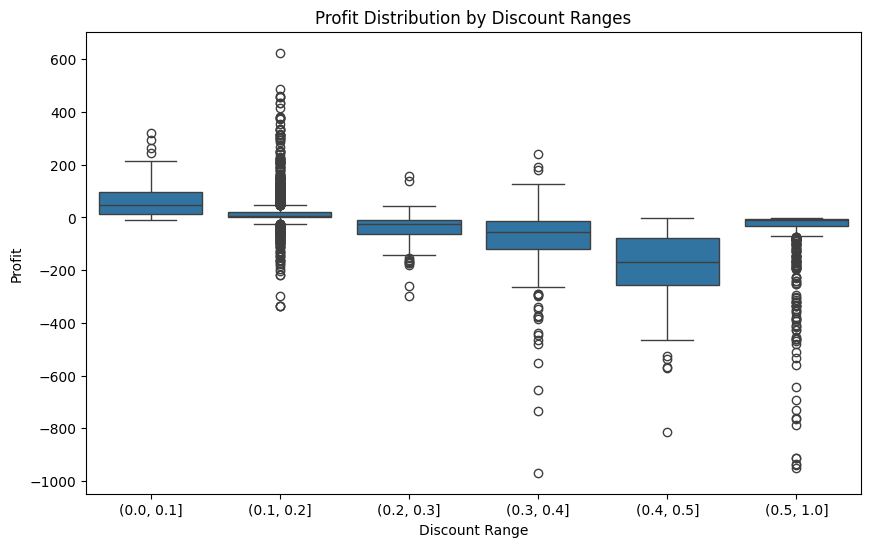

In [63]:
from scipy.stats import pearsonr

# Calculate correlation between discount and profit
correlation, p_value = pearsonr(df_cleaned['Discount'], df_cleaned['Profit'])
print(f'Correlation between Discount and Profit: {correlation:.2f}')
print(f'P-value: {p_value:.2f}')

# Visualize the relationship between discount and profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df_cleaned, alpha=0.6)
plt.title('Relationship between Discount and Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

# Visualize the distribution of profit for different discount ranges
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(df_cleaned['Discount'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]), y='Profit', data=df_cleaned)
plt.title('Profit Distribution by Discount Ranges')
plt.xlabel('Discount Range')
plt.ylabel('Profit')
plt.show()

**Insights :**
- Scatter plot menunjukkan tren umum di mana ketika diskon meningkat, laba/profit cenderung menurun.
- Ketika diskon meningkat melebihi 20%, scatter plot menunjukkan bahwa keuntungan semakin cenderung negatif.
- Plot kotak memberikan pandangan yang lebih jelas tentang bagaimana distribusi keuntungan berubah di berbagai rentang diskon.
- Ketika rentang diskon meningkat, median laba bergeser ke bawah.
- Perhitungan korelasi yang diberikan sebelumnya menunjukkan korelasi negatif antara diskon dan keuntungan, yang selaras dengan pengamatan visual.

Dari analisa di atas kita dapat menjawab pertanyaan :
- Bagaimana tingkat _discount_ mempengaruhi profit transaksi penjualan secara keseluruhan?
    + Tingkat diskon yang lebih tinggi memiliki dampak negatif yang nyata terhadap laba, terutama ketika diskon meningkat melebihi 20%. Hal ini menunjukkan perlunya pertimbangan yang cermat ketika menawarkan diskon tinggi, karena dapat menyebabkan penurunan laba yang signifikan.


## **5. Lokasi Negara Yang Menunjukkan Potensi Pertumbuhan**

Setelah mengetahui korelasi diskon dengan profit, kita akan meninjau lokasi negara mana yang menunjukkan potensi pertumbuhan. Mulai dari Region, lalu turun ke SubRegion, dan Country.

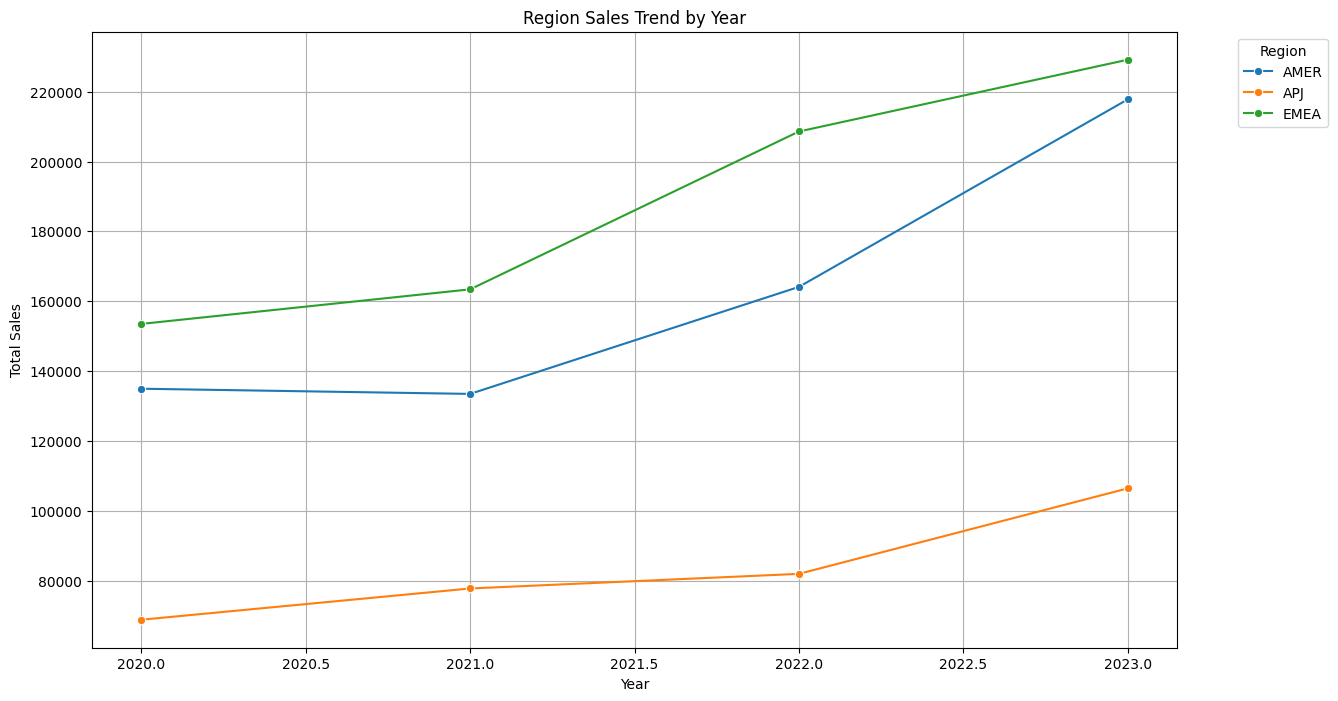

In [64]:
# Group by region and year to analyze sales trend
region_sales_trend = df_cleaned.groupby(['Region', 'Year']).agg({
    'Sales': 'sum'
}).reset_index()

# Plot the sales trend by region and year
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Sales', hue='Region', data=region_sales_trend, marker='o')
plt.title('Region Sales Trend by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Insights :**
- Semua wilayah menunjukkan tren peningkatan total penjualan dari tahun 2020 hingga 2023, yang mengindikasikan pertumbuhan secara keseluruhan.
- EMEA (Eropa, Timur Tengah, dan Afrika) menunjukkan total penjualan tertinggi sepanjang tahun.
    + Wilayah ini memiliki peningkatan penjualan yang stabil dan konsisten, mencapai lebih dari 220.000 pada tahun 2023.
    + Hal ini menunjukkan keberadaan pasar yang kuat dan pertumbuhan yang berkelanjutan di wilayah EMEA.
- Wilayah AMER (Amerika) juga menunjukkan pertumbuhan tetapi dengan kecepatan yang lebih lambat dibandingkan dengan EMEA.
    + Total penjualan di wilayah AMER mulai dari sekitar 140.000 pada tahun 2020 dan meningkat menjadi sekitar 180.000 pada tahun 2023.
    + Hal ini mengindikasikan tingkat pertumbuhan yang stabil namun moderat di Amerika.
- Wilayah APJ (Asia-Pasifik dan Jepang) dimulai dengan total penjualan terendah pada tahun 2020, sekitar 80.000.
    + Meskipun dimulai lebih rendah, APJ menunjukkan pertumbuhan yang signifikan, dengan penjualan hampir dua kali lipat menjadi sekitar 160.000 pada tahun 2023.

Kita akan melihat top 5 negara di semua _Region_ untuk cek negara mana yang memiliki potensi pertumbuhan tinggi.

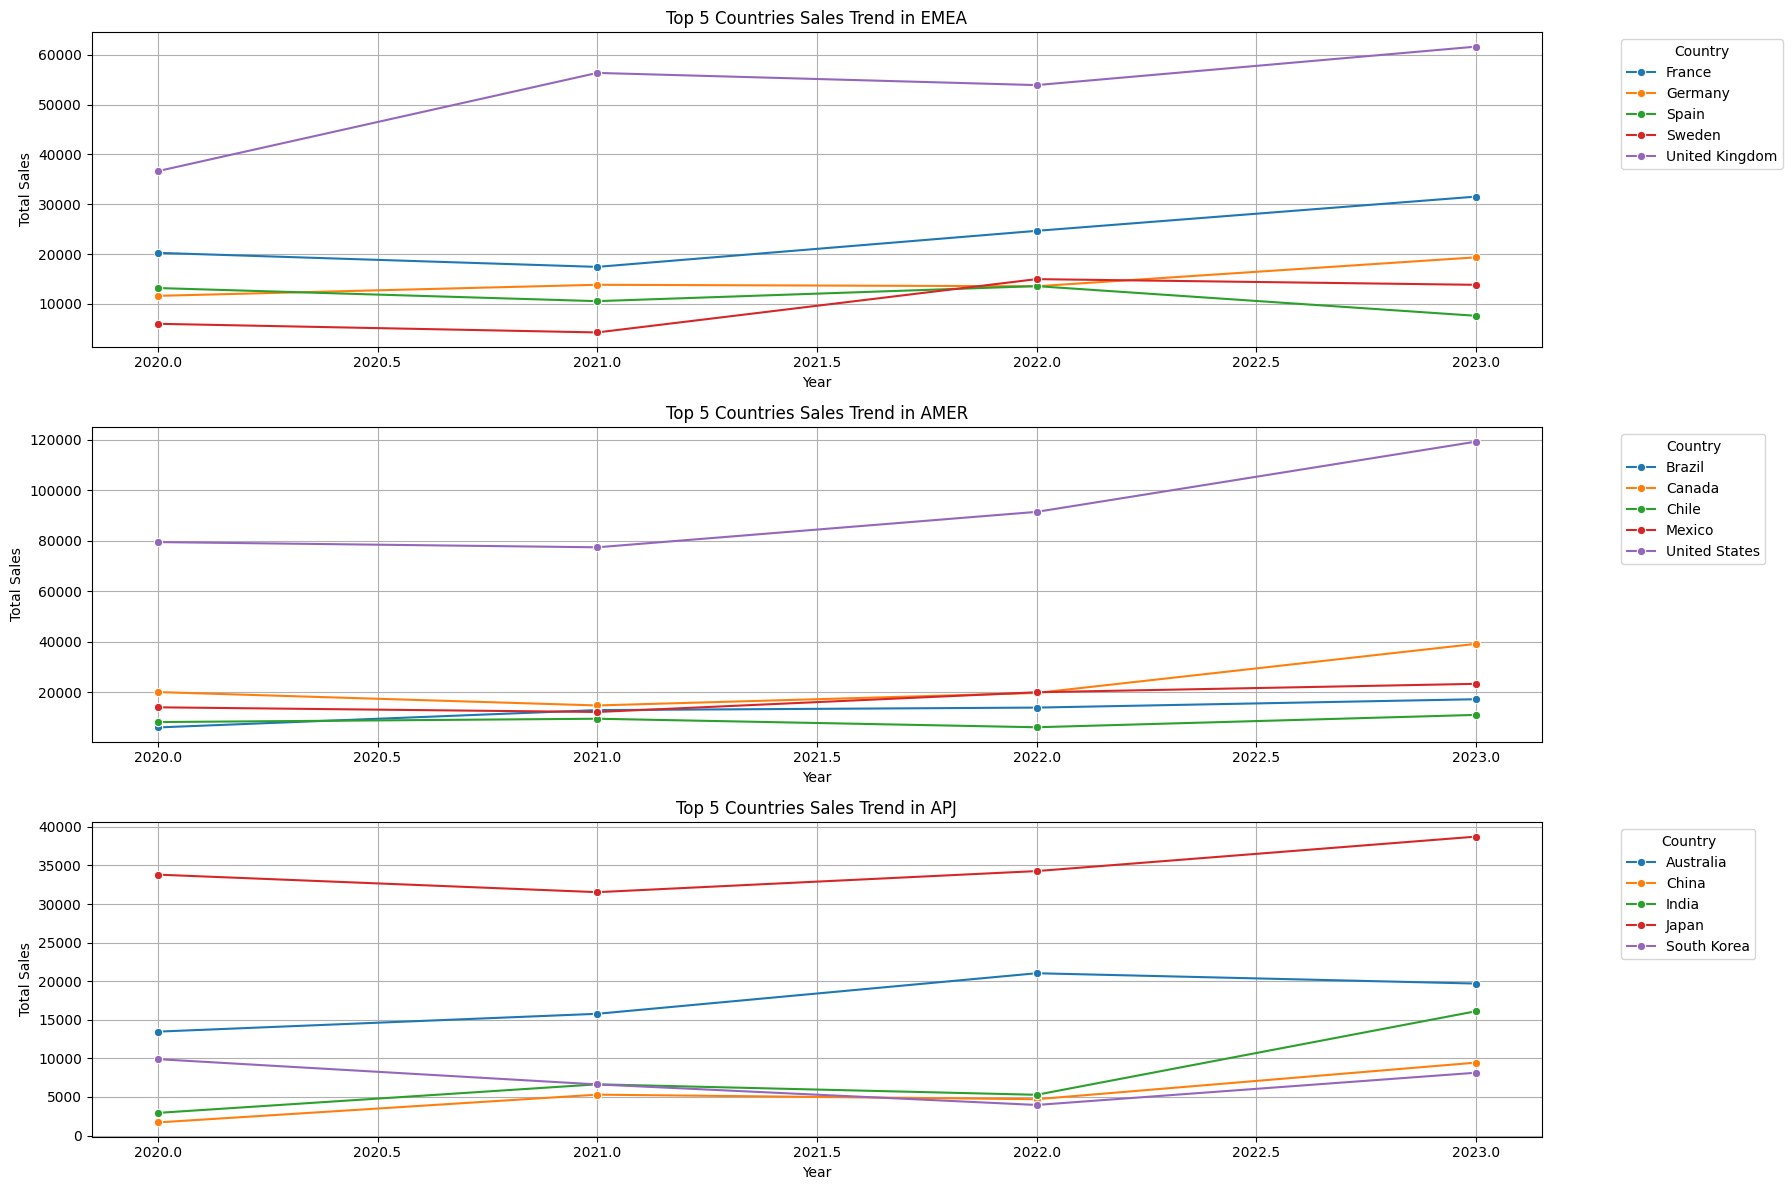

In [65]:
# Group by country, region, and year to analyze sales trend
country_region_sales_trend = df_cleaned.groupby(['Country', 'Region', 'Year']).agg({
    'Sales': 'sum'
}).reset_index()

# Separate data for each region
emea_sales_trend = country_region_sales_trend[country_region_sales_trend['Region'] == 'EMEA']
amer_sales_trend = country_region_sales_trend[country_region_sales_trend['Region'] == 'AMER']
apj_sales_trend = country_region_sales_trend[country_region_sales_trend['Region'] == 'APJ']

# Get top 5 countries by total sales in each region
top_5_emea = emea_sales_trend.groupby('Country')['Sales'].sum().nlargest(5).index
top_5_amer = amer_sales_trend.groupby('Country')['Sales'].sum().nlargest(5).index
top_5_apj = apj_sales_trend.groupby('Country')['Sales'].sum().nlargest(5).index

# Filter data for top 5 countries in each region
top_5_emea_sales_trend = emea_sales_trend[emea_sales_trend['Country'].isin(top_5_emea)]
top_5_amer_sales_trend = amer_sales_trend[amer_sales_trend['Country'].isin(top_5_amer)]
top_5_apj_sales_trend = apj_sales_trend[apj_sales_trend['Country'].isin(top_5_apj)]

# Plot the sales trend for top 5 countries in each region
plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
sns.lineplot(x='Year', y='Sales', hue='Country', data=top_5_emea_sales_trend, marker='o')
plt.title('Top 5 Countries Sales Trend in EMEA')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.subplot(3, 1, 2)
sns.lineplot(x='Year', y='Sales', hue='Country', data=top_5_amer_sales_trend, marker='o')
plt.title('Top 5 Countries Sales Trend in AMER')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.subplot(3, 1, 3)
sns.lineplot(x='Year', y='Sales', hue='Country', data=top_5_apj_sales_trend, marker='o')
plt.title('Top 5 Countries Sales Trend in APJ')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

Dari visualisasi data di atas, kita dapat menjawab pertanyaan :
- Negara manakah yang menunjukkan potensi pertumbuhan tertinggi berdasarkan data penjualan?
    + Amerika Serikat dan Inggris menunjukkan potensi pertumbuhan yang paling menjanjikan dengan peningkatan penjualan yang substansial.
    + Jepang, selain memimpin di wilayah APJ, juga menunjukkan stabilitas dan pertumbuhan pasar yang kuat.
    + Pasar negara berkembang seperti India dan Brasil menunjukkan potensi ekspansi yang signifikan dengan tren kenaikannya.

# **KESIMPULAN DAN REKOMENDASI**

- **Kesimpulan :**
    - Tren Penjualan:
        + Dari data di atas, dapat disimpulkan bahwa tren _sales_ terus naik dari tahun ke tahun mulai dari 2020 dengan jumlah transaksi di bawah 2000, menjadi lebih dari 3200 pada tahun 2023. Seiring dengan terus meningkatnya transaksi setiap tahun, namun tren penjualan cenderung sama pada setiap bulannya (selalu naik pada bulan September sampai Desember, dan cenderung stabil pada bulan sebelumnya).
    - Karakteristik Customer:
        + Pelanggan yang melakukan lebih banyak pembelian cenderung membelanjakan lebih banyak secara keseluruhan. Contohnya mulai dari pembelian di bawah _peak_ nya yaitu 100 cenderung sedikit karena harga barangnya yang tergolong tinggi, sehingga _customer_ akan cenderung hanya dapat melakukan pembelian dengan sedikit banyaknya.
        + Segmen SMB (_Small Medium Bussiness_) menjadi segmen dengan persentase terbesar dalam _total sales_ karena berbagai alasan, salah satunya adalah dalam fase pertumbuhan ketika mereka berinvestasi lebih besar pada produk dan layanan untuk meningkatkan skala operasi mereka.
        + Customer teratas dengan ID 1009 memiliki _total sales_ $33936,7.
        + Pelanggan dengan jumlah pembelian yang lebih tinggi umumnya memiliki total penjualan (_total sales_) yang lebih tinggi.
    - Kontribusi Produk:
        + Penjualan (_Sales_) tertinggi diperoleh produk bernama FinanceHub dengan total _sales_ $291749.94.
        + Profit tertinggi diperoleh produk bernama _Data Smasher_ dengan jumlah profit $38895.88.
    - Pengaruh Diskon:
        + Diskon terbesar adalah 80% dan diskon terendah adalah 10%.
        + Mulai tingkat diskon 20% sampai lebih dari 50%, bisa membuat profit penjualan mencapai negatif (merugikan).
    - Negara Dengan Potensi Pertumbuhan:
        + Negara yang menunjukkan perkembangan penjualan tertinggi (_sales_) dari _region_ EMEA adalah Inggris (_United Kingdom_), Region AMER adalah Amerika (_United States_), dan Region APJ adalah Jepang (_Japan_).

- **Rekomendasi :**
    - Promosi bulan-bulan sebelum kuartal ke-4 memiliki total _sales_ yang cenderung rendah, yaitu Januari sampai Agustus. Promosi ini bisa mengikuti _event_ yang ada di bulan tersebut seperti:
        + 24 Januari (Hari Pendidikan Internasional) : Dapat memberikan penawaran khusus seperti diskon 50% dalam rentang 7 hari untuk mengubah akun gratis menjadi akun premium.
        + 21 Maret (International Day for the Elimination of Racial Discrimination, World Poetry Day, International Day of Forests) : Mengadakan _event_ offline di hari ini, untuk mendapatkan _product awarness_ lebih.
        + 1 Mei (International Workers' Day) : Memberikan diskon 20% untuk semua produk dengan kuantitas pembelian di atas 5, dan 30% di atas kuantitas 10.
        + 30 Juli (International Day of Friendship) : Membuat kode refferal dan _reward_ dalam rentang waktu 7 hari untuk pengguna yang berhasil merekrut orang lain.
        + 12 Agustus (International Youth Day) : Membuat _event offline_ di sekolah sampai universitas.
    - Utamakan _customer_ dengan _high sales_ seperti _Valero Energy_, _American Express_, _Volkswagen_, dan _Allianz_
    - Fokus kepada segmen Enterprise, buat sosialisasi pentingnya AWS.
    - Terus jaga produk _FinanceHub_ karena memiliki _total sales_ yang paling tinggi.
        + Namun tidak menutup mata pada produk lain, bisa dilakukan bundling untuk setiap pembelian produk _FinanceHub_, sepert dengan menaikkan 20% harga beli _FinanceHub_ untuk langsung mendapatkan produk lain dengan pilihan produk dengan _sales_ dan _profit_ yang tergolong rendah seperti _ChatbotPlugin_ dan _Marketing Suites_.
    - Kurangi diskon di atas 50%, karena ini akan sangat memberikan dampak, yaitu profit negatif. Maksimalkan diskon di 35% saja untuk hari biasa. Kemudian untuk 1 hari pada hari - hari promosi untuk memberikan diskon di atas 50%. Ini dilakukan untuk mengurangi profit negatif.
    - Untuk kebijakan refund yang merupakan kesalahan pembeli, berikan potongan 20% dari total belinya.
    - Berikan promosi dan event pada negara-negara yang memiliki potensi pertumbuhan terendah. Ikuti tanggal kalender pada negara tersebut untuk menyiapkan event sesuai negara untuk menjaga tren dari pertumbuhan _sales_.
    - Berikan aplikasi dengan tema sakura untuk negara Jepang, dan sepakbola pada negara Brazil yang digunakan bukan sekedar hiasan, namun juga untuk menarik customer yang berasal dari kedua negara tersebut.

Dengan melakukan rekomendasi di atas, diharapkan perusahaan mampu mengepakkan sayap lebih lebar di berbagai negara, dan juga tentunya meningkatkan _sales_ dan _profit_ kedepannya.